# Which Megaline plan is better?
The commercial department, for the telecom operator, Megaline, wants to know which of the plans brings in more revenue, in order to adjust their advertising budget. The company offers its clients two prepaid plans:

- Surf 
- Ultimate


## I will analyze the data, based on 500 Megaline clients, for the year of 2018, and seek to find:
- which prepaid plan brings in more revenue
- number of calls made
- minutes used per month
- number of text messages sent per month
- volume of data per month
- monthly revenue from each user

### I also want to use hypthesis testing to find out:
- how the average revenue from the two plans differ
- how the revenue from users in these regions differ from other regions:
  - New York
  - New Jersey


### I will also create visual graphs to plot the distribution of data.

<h2 style="color: red;">Initialization.</h2>

In [539]:
# Load in libraries
import pandas as pd
from IPython.display import HTML, display
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from cycler import cycler
import scipy.stats as st

In [540]:
#Create a function to save time when displaying comments
def show_html_output(text):
    display(HTML(f"<div style='color: hotpink;'><b>{text}</b></div>"))

In [541]:
# Call the new HTML function :
show_html_output(f"Load in the 5 data sets:")

In [542]:
# Load in Plans data set
plans = pd.read_csv('../datasets/megaline_plans.csv')
display(plans.head(3))

messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate

In [543]:
# Load in Users data set
users = pd.read_csv('../datasets/megaline_users.csv')
display(users.head(3))

user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN

In [544]:
show_html_output(f"The city column in the users dataframe, is a mess. This will need to be cleaned up.")

In [545]:
# Load in Calls data set
calls = pd.read_csv('../datasets/megaline_calls.csv')
display(calls.head(3))

id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48

In [546]:
# Load in Messages data set
messages = pd.read_csv('../datasets/megaline_messages.csv')
display(messages.head(3))

id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31

In [547]:
# Load in Internet data set
internet = pd.read_csv('../datasets/megaline_internet.csv')
display(internet.head(3))

id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40

<div class="alert alert-info"><font color='hotpink'>
<b>Reading in the data sets:</b>
<br>
- I read in each data set.
<br>
- I displayed each dataframe to make sure that the files were not separated by semicolons (;). They were not, so I did not have to use sep=";"
<br>
</div></font color>

<h2 style="color: red;">Prepare the data</h2>

## <span style="color: hotpink;">Plans dataframe</span>

### Inspect the data

In [552]:
display(plans.head(5))

messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate

In [553]:
plans.shape

(2, 8)

In [554]:
show_html_output(f"There are only 2 rows. This dataframe is a description of the two different plans. ")

In [555]:
plans.columns

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name'],
      dtype='object')

In [556]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [557]:
# The datatypes look good. There is no missing data.

In [558]:
# some of the column names to be shorter names, so that the dataframe is not so wide.

In [559]:
#plan_name needs to be renamed to match users dataframe

In [560]:
# Need to change mb_per_month_included to gb_per_month_included. Then change datatype to float.

### Clean the Plans dataframe

In [562]:
plans['mb_per_month_included'] = plans['mb_per_month_included'].astype(float)
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      float64
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(3), int64(4), object(1)
memory usage: 260.0+ bytes


In [563]:
show_html_output(f"There are no missing rows in the Plans dataframe.")

In [564]:
show_html_output(f"Convert megabytes to gigabytes.")

In [565]:
plans['mb_per_month_included'] = plans['mb_per_month_included']  * .001

In [566]:
display(plans)

messages_included  mb_per_month_included  minutes_included  \
0                 50                  15.36               500   
1               1000                  30.72              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate

In [567]:
# Rename mb_per_month_included
plans = plans.rename(columns={'mb_per_month_included': 'gb_included'})

In [568]:
# Rename minutes_included
plans = plans.rename(columns={'minutes_included': 'min_included'})

In [569]:
# Rename the column 'messages_included'
plans = plans.rename(columns={'messages_included': 'msg_included'})

In [570]:
# Rename the usd_monthly_pay column
plans = plans.rename(columns={'usd_monthly_pay': 'monthly_fee'})

In [571]:
# Rename the usd_per_gb
plans = plans.rename(columns={'usd_per_gb': 'fee_per_gb'})

In [572]:
# Rename the usd_per_message
plans = plans.rename(columns={'usd_per_message': 'fee_per_msg'})

In [573]:
# Rename the usd_per_minute
plans = plans.rename(columns={'usd_per_minute': 'fee_per_min'})

In [574]:
# Rename plan_name column
plans = plans.rename(columns={'plan_name': 'plan'})

In [575]:
display(plans)

msg_included  gb_included  min_included  monthly_fee  fee_per_gb  \
0            50        15.36           500           20          10   
1          1000        30.72          3000           70           7   

   fee_per_msg  fee_per_min      plan  
0         0.03         0.03      surf  
1         0.01         0.01  ultimate

In [576]:
# I will round down the gb_included column

In [577]:
# Round down
plans['gb_included'] = np.floor(plans['gb_included'])
display(plans)

msg_included  gb_included  min_included  monthly_fee  fee_per_gb  \
0            50         15.0           500           20          10   
1          1000         30.0          3000           70           7   

   fee_per_msg  fee_per_min      plan  
0         0.03         0.03      surf  
1         0.01         0.01  ultimate

In [578]:
# change gb_included datatype

In [579]:
plans['gb_included'] = plans['gb_included'].astype(int)
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   msg_included  2 non-null      int64  
 1   gb_included   2 non-null      int64  
 2   min_included  2 non-null      int64  
 3   monthly_fee   2 non-null      int64  
 4   fee_per_gb    2 non-null      int64  
 5   fee_per_msg   2 non-null      float64
 6   fee_per_min   2 non-null      float64
 7   plan          2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [580]:
display(plans)

msg_included  gb_included  min_included  monthly_fee  fee_per_gb  \
0            50           15           500           20          10   
1          1000           30          3000           70           7   

   fee_per_msg  fee_per_min      plan  
0         0.03         0.03      surf  
1         0.01         0.01  ultimate

<div class="alert alert-info"><font color='hotpink'>
<b>Cleaning the Plans dataframe:</b>
<br>
- I displayed the dataframe. It was only 2 rows long. It explained the two Megaline plan options.
<br>
- I used .info() to see the datatypes. Since the mb_per_month_included column was listed in megabytes, but the plan charges extra per gigabyte, I changed the type of this column to float, and multiplied it by .001 to convert to gigabytes.
<br>
- I renamed most of the column names, so that they would be shorter, and the dataframe would be easier to read.
<br>
- plan_name was renamed to plan, to match the users dataframe.
<br>
- I used np.floor to round down the gb_included column because the Megaline surf plan states that there are 15 GB included per month, and ultimate plan has 30.
<br>
 - I changed the datatype, of gb_included, to be int. Since the GB included, per month, are 15 and 30, and that will not change, there was no point in have the decimals.   
</font color></div>

## <span style="color: hotpink;">Users dataframe</span>

### Inspect the data

In [584]:
display(users.head(5))

user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN

In [585]:
show_html_output(f"Filter out the NY and NJ customers.")

In [586]:
# Filter the users dataFrame to find rows where the 'city' column contains 'NY-NJ', and add a column to the users dataframe.
users['is_ny_nj'] = users['city'].str.contains('NY|NJ', na=False)
display(users.sample(10))

user_id first_name  last_name  age  \
83      1083     Lyndia    Acevedo   65   
245     1245      Quinn      David   30   
72      1072    Seymour     Spence   66   
428     1428   Asuncion     Conrad   66   
50      1050       Jone       Owen   23   
194     1194     Robert     Mclean   40   
444     1444     Glinda  Dickerson   70   
496     1496      Ariel   Shepherd   49   
170     1170       Olin     Adkins   18   
178     1178   Charlsie       Reid   53   

                                              city    reg_date      plan  \
83          Los Angeles-Long Beach-Anaheim, CA MSA  2018-10-26      surf   
245      New York-Newark-Jersey City, NY-NJ-PA MSA  2018-06-19      surf   
72             Dallas-Fort Worth-Arlington, TX MSA  2018-07-12      surf   
428                  Phoenix-Mesa-Chandler, AZ MSA  2018-10-23      surf   
50   Miami-Fort Lauderdale-West Palm Beach, FL MSA  2018-03-20  ultimate   
194         San Jose-Sunnyvale-Santa Clara, CA MSA  2018-05-31      surf   
444                      New Haven-Milford, CT MSA  2018-06-20      surf   
496                   New Orleans-Metairie, LA MSA  2018-02-20      surf   
170                             Pittsburgh, PA MSA  2018-09-25      surf   
178                       Cincinnati, OH-KY-IN MSA  2018-10-05      surf   

     churn_date  is_ny_nj  
83   2018-12-18     False  
245         NaN      True  
72          NaN     False  
428         NaN     False  
50   2018-10-07     False  
194         NaN     False  
444         NaN     False  
496         NaN     False  
170         NaN     False  
178         NaN     False

In [587]:
users.shape

(500, 9)

In [588]:
#There are 500 rows, and 8 columns in the Users dataframe.

In [589]:
users.columns

Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date', 'is_ny_nj'],
      dtype='object')

In [590]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
 8   is_ny_nj    500 non-null    bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 31.9+ KB


In [591]:
churn_total_rows = 500
churn_rows_w_data = 34
rows_with_missing_churn_data = churn_total_rows - churn_rows_w_data
missing_churn_data_percentage = (rows_with_missing_churn_data / churn_total_rows) * 100
show_html_output(f"churn_date is the only column with missing data. {missing_churn_data_percentage:.2f}% of the data is missing from this column.")

In [592]:
# user_id needs to change to object
# reg_date needs to change to datetime type
# churn_date also needs to change to datetime type

### Clean the Users dataframe

In [594]:
#Change user_id to type object.
users['user_id'] = users['user_id'].astype(object)

In [595]:
# Change the reg_date column to month first
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['reg_date'] = users['reg_date'].dt.strftime('%m-%d-%y')
display(users.tail(3))

user_id first_name   last_name  age  \
497    1497      Donte     Barrera   49   
498    1498       Scot  Williamson   51   
499    1499      Shena     Dickson   37   

                                          city  reg_date      plan churn_date  \
497     Los Angeles-Long Beach-Anaheim, CA MSA  12-10-18  ultimate        NaN   
498  New York-Newark-Jersey City, NY-NJ-PA MSA  02-04-18      surf        NaN   
499          Orlando-Kissimmee-Sanford, FL MSA  05-06-18      surf        NaN   

     is_ny_nj  
497     False  
498      True  
499     False

In [596]:
#What should I do about the NaN in the churn_date column?

In [597]:
#Convert 'churn_date' column to datetime
users['churn_date'] = pd.to_datetime(users['churn_date'], errors='coerce')
users['churn_date'] = users['churn_date'].dt.strftime('%m-%d-%y')
display(users.head(15))

user_id first_name  last_name  age  \
0     1000   Anamaria      Bauer   45   
1     1001     Mickey  Wilkerson   28   
2     1002     Carlee    Hoffman   36   
3     1003   Reynaldo    Jenkins   52   
4     1004    Leonila   Thompson   40   
5     1005      Livia    Shields   31   
6     1006     Jesusa   Bradford   73   
7     1007    Eusebio      Welch   42   
8     1008      Emely    Hoffman   53   
9     1009      Gerry     Little   19   
10    1010     Wilber      Blair   52   
11    1011     Halina      Henry   73   
12    1012    Jonelle    Mcbride   59   
13    1013    Nicolas     Snider   50   
14    1014    Edmundo      Simon   61   

                                         city  reg_date      plan churn_date  \
0       Atlanta-Sandy Springs-Roswell, GA MSA  12-24-18  ultimate        NaN   
1             Seattle-Tacoma-Bellevue, WA MSA  08-13-18      surf        NaN   
2        Las Vegas-Henderson-Paradise, NV MSA  10-21-18      surf        NaN   
3                               Tulsa, OK MSA  01-28-18      surf        NaN   
4             Seattle-Tacoma-Bellevue, WA MSA  05-23-18      surf        NaN   
5         Dallas-Fort Worth-Arlington, TX MSA  11-29-18      surf        NaN   
6      San Francisco-Oakland-Berkeley, CA MSA  11-27-18  ultimate   12-18-18   
7               Grand Rapids-Kentwood, MI MSA  07-11-18      surf        NaN   
8           Orlando-Kissimmee-Sanford, FL MSA  08-03-18  ultimate        NaN   
9      San Jose-Sunnyvale-Santa Clara, CA MSA  04-22-18      surf        NaN   
10        Dallas-Fort Worth-Arlington, TX MSA  03-09-18      surf        NaN   
11                   Cleveland-Elyria, OH MSA  01-18-18  ultimate        NaN   
12     Chicago-Naperville-Elgin, IL-IN-WI MSA  06-28-18      surf   11-16-18   
13                          Knoxville, TN MSA  12-01-18  ultimate        NaN   
14  New York-Newark-Jersey City, NY-NJ-PA MSA  11-25-18      surf        NaN   

    is_ny_nj  
0      False  
1      False  
2      False  
3      False  
4      False  
5      False  
6      False  
7      False  
8      False  
9      False  
10     False  
11     False  
12     False  
13     False  
14      True

In [598]:
users.dtypes

user_id       object
first_name    object
last_name     object
age            int64
city          object
reg_date      object
plan          object
churn_date    object
is_ny_nj        bool
dtype: object

In [599]:
users.describe()

age
count  500.000000
mean    45.486000
std     16.972269
min     18.000000
25%     30.000000
50%     46.000000
75%     61.000000
max     75.000000

In [600]:
# Print a sample of a fixed number of rows 
print("Sample of 10 rows:")
display(users.sample(10))

Sample of 10 rows:


user_id first_name  last_name  age  \
182    1182       Jeff       Burt   39   
108    1108   Porfirio       Kane   45   
19     1019     Shizue     Landry   34   
493    1493     Cicely       Wynn   18   
373    1373    Lindsey  Dickerson   21   
277    1277     Andrew   Faulkner   25   
203    1203      Manie     Grimes   50   
194    1194     Robert     Mclean   40   
483    1483     Miguel    Farrell   35   
250    1250      Milan    Sellers   57   

                                            city  reg_date      plan  \
182        Charlotte-Concord-Gastonia, NC-SC MSA  05-29-18      surf   
108                       Salt Lake City, UT MSA  12-30-18  ultimate   
19                          Jacksonville, FL MSA  01-16-18      surf   
493           Boston-Cambridge-Newton, MA-NH MSA  03-06-18  ultimate   
373  Minneapolis-St. Paul-Bloomington, MN-WI MSA  08-30-18  ultimate   
277    New York-Newark-Jersey City, NY-NJ-PA MSA  02-02-18      surf   
203           Boston-Cambridge-Newton, MA-NH MSA  02-11-18      surf   
194       San Jose-Sunnyvale-Santa Clara, CA MSA  05-31-18      surf   
483       Chicago-Naperville-Elgin, IL-IN-WI MSA  04-25-18      surf   
250     Houston-The Woodlands-Sugar Land, TX MSA  04-03-18  ultimate   

    churn_date  is_ny_nj  
182        NaN     False  
108        NaN     False  
19         NaN     False  
493        NaN     False  
373        NaN     False  
277        NaN      True  
203        NaN     False  
194        NaN     False  
483        NaN     False  
250        NaN     False

In [601]:
show_html_output(f"There's a lot of cleaning to do in the city column.")

In [602]:
#Need to remove 'MSA' from the city column.
users['city'] = users['city'].str.replace(' MSA', '', regex=False).str.strip()

In [603]:
display(users.head(3))

user_id first_name  last_name  age                               city  \
0    1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA   
1    1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA   
2    1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV   

   reg_date      plan churn_date  is_ny_nj  
0  12-24-18  ultimate        NaN     False  
1  08-13-18      surf        NaN     False  
2  10-21-18      surf        NaN     False

In [604]:
#Need to remove the State from the city column
users['city'] = users['city'].str.split(',', expand=True)[0]

In [605]:
display(users.head(3))

user_id first_name  last_name  age                           city  reg_date  \
0    1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell  12-24-18   
1    1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue  08-13-18   
2    1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise  10-21-18   

       plan churn_date  is_ny_nj  
0  ultimate        NaN     False  
1      surf        NaN     False  
2      surf        NaN     False

In [606]:
#Need to remove the larger city-centers from the city column
users['city'] = users['city'].str.split('-').str[-1].str.strip()

In [607]:
display(users.sample(3))

user_id first_name last_name  age             city  reg_date      plan  \
50     1050       Jone      Owen   23  West Palm Beach  03-20-18  ultimate   
177    1177    Seymour  Anderson   33         Bellevue  11-09-18      surf   
99     1099     Shavon     Banks   48      Jersey City  02-26-18      surf   

    churn_date  is_ny_nj  
50    10-07-18     False  
177        NaN     False  
99         NaN      True

In [608]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    object
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
 8   is_ny_nj    500 non-null    bool  
dtypes: bool(1), int64(1), object(7)
memory usage: 31.9+ KB


In [609]:
# is_ny_nj is type bool

In [610]:
#city column looks good now.

<div class="alert alert-info"><font color='hotpink'>
<b>Cleaning the Users dataframe:</b>
<br>
- There are 500 rows in the dataframe, and churn_date is the only column with missing data. But, 93.2% of that row has missing data.
<br>
- The naming of the columns look good.
<br>
- I changed the user_id column to object type, because I will not be doing math on that column.
<br>
- I used to_datetime and dt.strftime on the reg_date column, to change the date so that it prints out as mm-dd-yy.
<br>
- I also used to_datetime and dt.strftime on the churn_date column, and used errors='coerce' because the column was mostly full of Nan.
<br>
- I used describe to get the average age of users. The avg age is 45.5 years old.
<br>
- I used str.replace and str.strip to remove the unecessary 'MSA' in the city name column.
<br>
- I used str.split to get rid of the State that was unecessarily in the city column.
<br>
- I used str.split to get rid of the extra city names that were inside the city column, using -1, to grab only the city that was listed last. The city listed last would represent the actual city that the user lives in, and not the bigger metropolitan area.
<br>
- I used sample, to grab a random sampling of the data, and ran that a few times over, to make sure that the city column is now looking good.
<br>
<br>
<b>The NY and NJ users were filtered out</b>
<br>
-  A new boolean column, 'is_ny_nj', was added  to the users database. If a user's city is NY or NJ, then the is_ny_nj is marked as True. This column will be used later, when revenue for NY and NJ is analyzed. The reason why this column needed to be created now was that the States info is removed from the 'city' column during the cleaning phase. So, doing a search for "NY-NJ", after the cleaning of the users dataframe, would result in no rows.
</div></font color>

## <span style="color: hotpink;">Calls dataframe</span>

### Inspect the data

In [614]:
display(calls.head(5))

id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22

In [615]:
calls.shape

(137735, 4)

In [616]:
#There are 137,735 rows and 4 columns in the calls dataframe.

In [617]:
calls.columns

Index(['id', 'user_id', 'call_date', 'duration'], dtype='object')

In [618]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [619]:
show_html_output(f"There are no missing rows in the Calls dataframe.")

In [620]:
# There is no missing data in the Calls dataframe.
# call_date will need to change to type datetime
# duration will have to be rounded up, to the nearest whole number
# user_id will need to change to object data type.
# id column name will need to change to call_id

### Clean the Calls dataframe

In [622]:
# Change the call_date column to month first
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['call_date'] = calls['call_date'].dt.strftime('%m-%d-%y')
display(calls.tail(8))

id  user_id call_date  duration
137727  1499_196     1499  11-22-18      0.27
137728  1499_197     1499  12-27-18      8.36
137729  1499_198     1499  10-26-18      6.41
137730  1499_199     1499  11-21-18      8.72
137731  1499_200     1499  10-20-18     10.89
137732  1499_201     1499  09-21-18      8.12
137733  1499_202     1499  10-10-18      0.37
137734  1499_203     1499  12-29-18     13.86

In [623]:
calls.dtypes

id            object
user_id        int64
call_date     object
duration     float64
dtype: object

In [624]:
# Round up 
calls['duration'] = np.ceil(calls['duration'])

In [625]:
#Change datatype of duration to int
calls['duration'] = calls['duration'].astype(int)

In [626]:
# check that the duration column was changed to type int
print(calls.head(5))

         id  user_id call_date  duration
0   1000_93     1000  12-27-18         9
1  1000_145     1000  12-27-18        14
2  1000_247     1000  12-27-18        15
3  1000_309     1000  12-28-18         6
4  1000_380     1000  12-30-18         5


In [627]:
calls['user_id'] = calls['user_id'].astype(object)

In [628]:
calls.dtypes

id           object
user_id      object
call_date    object
duration      int64
dtype: object

In [629]:
calls.describe()

duration
count  137735.000000
mean        7.146673
std         5.953919
min         0.000000
25%         2.000000
50%         6.000000
75%        11.000000
max        38.000000

In [630]:
# Rename the id column
calls = calls.rename(columns={'id': 'call_id'})
display(calls.tail(8))

call_id user_id call_date  duration
137727  1499_196    1499  11-22-18         1
137728  1499_197    1499  12-27-18         9
137729  1499_198    1499  10-26-18         7
137730  1499_199    1499  11-21-18         9
137731  1499_200    1499  10-20-18        11
137732  1499_201    1499  09-21-18         9
137733  1499_202    1499  10-10-18         1
137734  1499_203    1499  12-29-18        14

In [631]:
# Print a sample of a fixed number of rows 
print("Sample of 10 rows:")
print(calls.sample(10))

Sample of 10 rows:
         call_id user_id call_date  duration
29832     1113_2    1113  09-04-18        14
93500   1334_868    1334  05-25-18         9
61484   1222_131    1222  09-18-18         1
42574   1156_179    1156  09-04-18         9
132379  1476_329    1476  10-14-18         0
17852   1068_178    1068  06-13-18        16
106758  1377_310    1377  12-09-18         8
27427   1103_217    1103  11-24-18         4
50600   1182_207    1182  06-05-18        11
47371   1171_402    1171  06-17-18         4


<div class="alert alert-info"><font color='hotpink'>
<b>Cleaning the Calls dataframe:</b>
<br>
- There are 137,735 rows in the dataframe, and there is no missing data.
<br>
- I renamed the id column to be call_id, to distinguish it from the id columns in the messages and internet dataframes.
<br>
- I changed the call_date column to date time, using the to_datetime function.
<br>
- I used dt.strftime to change the order of the output, so that it prints as mm-dd-yy, to match the reg_date column of the users database.
<br>
- I used np.ceil function to round up the duration column to the nearest whole number, to match the phone company's rules of their plans.
<br>
- I added import numpy up above, at the top of the project, to accomodate the np.ceil function.
<br>
- I changed the data type of the duration column to int, because all that data has already been rounded up, and also, the phone plans require whole numbers for duration of call.
<br>
- I changed the data type of user_id to object. I am not planning on doing math on this column, as that would make no sense. 
<br>
- I used describe to get the average duration of phone calls. The avg is 7 minutes.
<br>
- I printed out a sample of the Calls dataframe, to make sure that everything looks fine.
</div></font color>

## <span style="color: hotpink;">Messages dataframe</span>

### Inspect the data

In [635]:
display(messages.head(5))

id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26

In [636]:
messages.shape

(76051, 3)

In [637]:
messages.columns

Index(['id', 'user_id', 'message_date'], dtype='object')

In [638]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [639]:
show_html_output(f"There are no missing rows in the Messages dataframe.")

In [640]:
# There is no missing data.
# message_date will have to change to date time type.
# Need to change name of message_date to a shorter name
# Need to change name of 'id' column.

In [641]:
print(messages.sample(10))

             id  user_id message_date
50952  1331_127     1331   2018-12-15
9093   1066_267     1066   2018-07-26
39598  1257_151     1257   2018-07-13
28876   1176_17     1176   2018-11-01
38833  1254_512     1254   2018-10-29
39370   1256_45     1256   2018-12-06
39192  1255_247     1255   2018-12-21
8365   1061_371     1061   2018-08-17
73547  1472_102     1472   2018-10-06
51436   1335_24     1335   2018-09-22


### Clean the Messages dataframe

In [643]:
messages['user_id'] = messages['user_id'].astype(object)
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  object
 2   message_date  76051 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [644]:
# Change the call_date column to month first
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['message_date'] = messages['message_date'].dt.strftime('%m-%d-%y')

In [645]:
# Rename the message_date column
messages = messages.rename(columns={'message_date': 'msg_date'})

In [646]:
# Rename the id column
messages = messages.rename(columns={'id': 'msg_id'})
display(messages.tail(10))

msg_id user_id  msg_date
76041  1497_502    1497  12-30-18
76042  1497_503    1497  12-29-18
76043  1497_507    1497  12-23-18
76044  1497_517    1497  12-17-18
76045  1497_524    1497  12-12-18
76046  1497_526    1497  12-24-18
76047  1497_536    1497  12-24-18
76048  1497_547    1497  12-31-18
76049  1497_558    1497  12-24-18
76050  1497_613    1497  12-23-18

<div class="alert alert-info"><font color='hotpink'>
<b>Cleaning the Messages dataframe:</b>
<br>
- I used .info() to find that there are 76051 rows in the dataframe, and there is no missing data.
<br>
- I changed the message_date column to date time, using the to_datetime function, and dt.strftime, so that it matches the date format of the other dataframes.
<br>
- I changed the message_date column to a shorter name.
<br>
- I changed the data type of the user_id column to object, because there is no need to do math on this column.
<br>
- I changed the name of the 'id' column to 'msg_id' to make it more descriptive, and to distinguish it from user_id.
</div></font color>

## <span style="color: hotpink;">Internet dataframe</span>

### Inspect the data

In [650]:
display(internet.head(5))

id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22

In [651]:
# id column needs to be renamed to 'int_id'.
# mb_used needs to be renamed to gb_used

In [652]:
internet.shape

(104825, 4)

In [653]:
# There are 104,825 columns, and 4 rows.

In [654]:
internet.columns

Index(['id', 'user_id', 'session_date', 'mb_used'], dtype='object')

In [655]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [656]:
# There are no missing rows.
# user_id datatype should be changed to object
# session_date needs to change to type date time

In [657]:
#mb_used needs to be converted from megabytes to gigabytes.

### Clean the Internet dataframe

In [659]:
# double check for missing values in the Internet dataframe
missing_internet_rows = internet.isna().sum()
print(missing_internet_rows)

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


In [660]:
show_html_output(f"There are no missing rows in the Internet dataframe.")

In [661]:
# Rename the id column
internet = internet.rename(columns={'id': 'int_id'})

In [662]:
# Rename the mb_used column
internet = internet.rename(columns={'mb_used': 'gb_used'})

In [663]:
#Change data type of user_id to object
internet['user_id'] = internet['user_id'].astype(object)

In [664]:
# Change session_date to type date time.
# Change the session_date column to month first
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['session_date'] = internet['session_date'].dt.strftime('%m-%d-%y')

In [665]:
show_html_output(f"Convert megabytes to gigabytes.")

In [666]:
internet['gb_used'] = internet['gb_used']  * .001

In [667]:
# Print a sample of data for the internet traffic
print(internet.sample(3))

         int_id user_id session_date  gb_used
37773  1171_144    1171     10-28-18  0.60544
65375   1301_65    1301     12-07-18  0.15142
44945  1199_215    1199     12-11-18  0.00000


In [668]:
print(internet.sample(10))

         int_id user_id session_date  gb_used
11723   1057_63    1057     12-24-18  0.27214
20583  1095_259    1095     06-27-18  0.00000
40545  1182_226    1182     10-18-18  0.79483
33682  1153_184    1153     10-17-18  0.43268
86397   1401_59    1401     12-23-18  0.05894
21597  1099_351    1099     05-11-18  0.00000
46792   1208_23    1208     12-29-18  0.00000
20673  1095_368    1095     11-17-18  0.67071
13539   1063_45    1063     12-16-18  0.56485
50404  1224_275    1224     08-04-18  0.39275


<div class="alert alert-info"><font color='hotpink'>
<b>Cleaning the Internet dataframe:</b>
<br>
- I renamed the id column to int_id to distinguish it from id columns in the calls, and messages dataframes.
<br>
- I renamed the mb_used column, to gb_used, because Megaline charges customers per GB, not per MB.
<br>
- I multiplied all items in the gb_used column, by .001, to convert the data from megabytes to gigabytes, because Megaline charges per gigabyte. 
<br>
- I changed use_id to type object, because I will not need to do math on this column.
<br>
- I used to_datetime and dt.strftime to change the output of the session_date column to print month first, to match the format of the other date columns in the other dataframes.
</font color></div>

<h2 style="color: red;">Plan conditions</h2>

In [671]:
show_html_output(f"These are the conditions of the two plans:")

<div class="alert alert-info"><font color='hotpink'>
<b>Surf plan:</b>
<br>
- \$20 base charge per month.
<br>
- 50 text messages are included per month. Go over that, and you pay 3 cents per extra message.
<br>
- 15.3 GB included per month. Go over that, and you pay $10 per extra GB.
<br>
- 500 call minutes included per month. Go over that, and you pay 3 cents per extra minute. 
</font color></div>

<div class="alert alert-info"><font color='hotpink'>
<b>Ultimate plan:</b>
<br>
- \$70 base charge per month.
<br>
- 1000 text messages are included per month. Go over that, and you pay 1 cent per extra message.
<br>
- 30.7 GB included per month. Go over that, and you pay $7 per extra GB.
<br>
- 3000 call minutes included per month. Go over that, and you pay 1 cent per extra minute. 
</font color></div>

<div class="alert alert-info"><font color='hotpink'>
<b>Megaline rounds up</b>
<br>
- Phone calls - seconds are rounded up, to whole minutes, for each call (if a phone call lasted one second, it will be rounded up, to one minute.)
<br>
- Internet sessions - megabytes are rounded up, to gigabytes, for the month (they are not rounded up per session.) 
</font color></div>

<h2 style="color: red;">Aggregate data per user</h2>

In [676]:
# Calls dataframe holds user_id
# Users dataframe holds user_id and also plan
# Messages dataframe holds user_id
# Internet dataframe holds user_id
# Plans dataframe holds plan

In [677]:
# Downcast numeric columns to save memory, because the kernal was failing, when attempting to merge 5 dataframes together.
#calls['user_id'] = pd.to_numeric(calls['user_id'], downcast='integer')
#users['user_id'] = pd.to_numeric(users['user_id'], downcast='integer')
#messages['user_id'] = pd.to_numeric(messages['user_id'], downcast='integer')
#internet['user_id'] = pd.to_numeric(internet['user_id'], downcast='integer')

<div class="alert alert-info"><font color='hotpink'>
<b>Find the answers to these questions: </b>
<br>
- What is the number of calls made by each user, per month?
<br>
- What is the amount of minutes spent by each user, per month?
<br>
- What is the number of messages sent by each user, per month?
<br>
- What is the volume of internet traffic used by each user, per month ?
</font color></div>

In [679]:
# Convert 'call_date' column to datetime format 
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%m-%d-%y')
print(calls.head(3))

    call_id user_id  call_date  duration
0   1000_93    1000 2018-12-27         9
1  1000_145    1000 2018-12-27        14
2  1000_247    1000 2018-12-27        15


In [680]:
# Calculate the number of calls made by each user per month.
# Extract month and year
calls['month'] = calls['call_date'].dt.month
print(calls.head(3))

    call_id user_id  call_date  duration  month
0   1000_93    1000 2018-12-27         9     12
1  1000_145    1000 2018-12-27        14     12
2  1000_247    1000 2018-12-27        15     12


In [681]:
show_html_output(f"Total number of calls, per user, by month:")

In [682]:
# Group by 'user_id' and 'month_year', to count calls
calls_per_user_monthly = calls.groupby(['user_id', 'month']).size().reset_index(name='call_count')
print(calls_per_user_monthly.head(10))

   user_id  month  call_count
0     1000     12          16
1     1001      8          27
2     1001      9          49
3     1001     10          65
4     1001     11          64
5     1001     12          56
6     1002     10          11
7     1002     11          55
8     1002     12          47
9     1003     12         149


In [683]:
show_html_output(f"Total duration of minutes, per user, by month:")

In [684]:
# Group by 'user_id' and 'month' to get the total duration
min_per_user_monthly = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
display(min_per_user_monthly.head(10))

user_id  month  duration
0     1000     12       124
1     1001      8       182
2     1001      9       315
3     1001     10       393
4     1001     11       426
5     1001     12       412
6     1002     10        59
7     1002     11       386
8     1002     12       384
9     1003     12      1104

In [685]:
show_html_output(f"Total number of text messages, per user, by month:")

In [686]:
# Convert 'msg_date' column to datetime format
messages['msg_date'] = pd.to_datetime(messages['msg_date'], format='%m-%d-%y')
# Extract month and year
messages['month'] = messages['msg_date'].dt.month

In [687]:
# Group by 'user_id' and 'month', count messages
msg_per_user_monthly = messages.groupby(['user_id', 'month']).size().reset_index(name='Total_messages')
display(msg_per_user_monthly.head(10))

user_id  month  Total_messages
0     1000     12              11
1     1001      8              30
2     1001      9              44
3     1001     10              53
4     1001     11              36
5     1001     12              44
6     1002     10              15
7     1002     11              32
8     1002     12              41
9     1003     12              50

In [688]:
show_html_output(f"Volume of internet traffic:")

In [689]:
# Convert 'session_date' column to datetime format
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%m-%d-%y')

In [690]:
# Extract month, and make new column in the internet dataframe
internet['month'] = internet['session_date'].dt.month

In [691]:
# Group by 'user_id' and 'month', and sum gb_used
gb_total = internet.groupby(['user_id', 'month'])['gb_used'].sum().reset_index()
display(gb_total.head(10))

user_id  month   gb_used
0     1000     12   1.90147
1     1001      8   6.91915
2     1001      9  13.31482
3     1001     10  22.33049
4     1001     11  18.50430
5     1001     12  19.36918
6     1002     10   6.55201
7     1002     11  19.34508
8     1002     12  14.39624
9     1003     12  27.04414

In [692]:
show_html_output(f"Merge these dataframes:")

In [693]:
# calls_per_user_monthly holds user_id, month, call_count
# min_per_user_monthly holds user_id, month, duration
# msg_per_user_monthly holds user_id, month, messages
# gb_total holds user_id, month, gb_used

In [694]:
# Merge calls_per_user_monthly with min_per_user_monthly
merged_df = pd.merge(calls_per_user_monthly, min_per_user_monthly, on=['user_id', 'month'], how='inner')

In [695]:
# Merge the result with msg_per_user_monthly
merged_df = pd.merge(merged_df, msg_per_user_monthly, on=['user_id', 'month'], how='inner')

In [696]:
# Merge the final result with gb_total
merged_df = pd.merge(merged_df, gb_total, on=['user_id', 'month'], how='inner')

In [697]:
# Display the result of all 4 dataframes merged
display(merged_df.head(10))

user_id  month  call_count  duration  Total_messages   gb_used
0     1000     12          16       124              11   1.90147
1     1001      8          27       182              30   6.91915
2     1001      9          49       315              44  13.31482
3     1001     10          65       393              53  22.33049
4     1001     11          64       426              36  18.50430
5     1001     12          56       412              44  19.36918
6     1002     10          11        59              15   6.55201
7     1002     11          55       386              32  19.34508
8     1002     12          47       384              41  14.39624
9     1003     12         149      1104              50  27.04414

In [698]:
# Merge the final merged_df with the 'plan' and 'is_ny_nj' columns from the plans dataframe
merged_users = pd.merge(merged_df, users[['user_id', 'plan', 'is_ny_nj']], on='user_id', how='inner')
display(merged_users.tail(3))

user_id  month  call_count  duration  Total_messages   gb_used      plan  \
1756    1496     11          39       308              13   8.54736      surf   
1757    1496     12          40       294              11  16.43899      surf   
1758    1497     12          54       300              50  11.10655  ultimate   

      is_ny_nj  
1756     False  
1757     False  
1758     False

In [699]:
# Merge the final merged_df with the entire plans DataFrame
merged_revenue = pd.merge(merged_users, plans, on='plan', how='inner')
#display(merged_revenue.sample(15))
display(merged_revenue.tail(8))

user_id  month  call_count  duration  Total_messages   gb_used      plan  \
1751    1494     11          82       509              35  18.40582      surf   
1752    1494     12          72       431              33  15.30245      surf   
1753    1496      8          18       122               2   8.60566      surf   
1754    1496      9          52       414              21  16.38927      surf   
1755    1496     10          46       317              18  14.28736      surf   
1756    1496     11          39       308              13   8.54736      surf   
1757    1496     12          40       294              11  16.43899      surf   
1758    1497     12          54       300              50  11.10655  ultimate   

      is_ny_nj  msg_included  gb_included  min_included  monthly_fee  \
1751      True            50           15           500           20   
1752      True            50           15           500           20   
1753     False            50           15           500           20   
1754     False            50           15           500           20   
1755     False            50           15           500           20   
1756     False            50           15           500           20   
1757     False            50           15           500           20   
1758     False          1000           30          3000           70   

      fee_per_gb  fee_per_msg  fee_per_min  
1751          10         0.03         0.03  
1752          10         0.03         0.03  
1753          10         0.03         0.03  
1754          10         0.03         0.03  
1755          10         0.03         0.03  
1756          10         0.03         0.03  
1757          10         0.03         0.03  
1758           7         0.01         0.01

In [700]:
show_html_output(f"Need to round up the gb_used column")

In [701]:
# Megaline rounds up the internet gb_used at the end of each month.
merged_revenue['gb_used'] = np.ceil(merged_revenue['gb_used'])
display(merged_revenue.tail(8))

user_id  month  call_count  duration  Total_messages  gb_used      plan  \
1751    1494     11          82       509              35     19.0      surf   
1752    1494     12          72       431              33     16.0      surf   
1753    1496      8          18       122               2      9.0      surf   
1754    1496      9          52       414              21     17.0      surf   
1755    1496     10          46       317              18     15.0      surf   
1756    1496     11          39       308              13      9.0      surf   
1757    1496     12          40       294              11     17.0      surf   
1758    1497     12          54       300              50     12.0  ultimate   

      is_ny_nj  msg_included  gb_included  min_included  monthly_fee  \
1751      True            50           15           500           20   
1752      True            50           15           500           20   
1753     False            50           15           500           20   
1754     False            50           15           500           20   
1755     False            50           15           500           20   
1756     False            50           15           500           20   
1757     False            50           15           500           20   
1758     False          1000           30          3000           70   

      fee_per_gb  fee_per_msg  fee_per_min  
1751          10         0.03         0.03  
1752          10         0.03         0.03  
1753          10         0.03         0.03  
1754          10         0.03         0.03  
1755          10         0.03         0.03  
1756          10         0.03         0.03  
1757          10         0.03         0.03  
1758           7         0.01         0.01

In [702]:
show_html_output(f"Create a function for monthly revenue for each user:")

In [703]:
# Create a function that accepts the plan name
# Separate surf plan from ultimate plan
def calculate_revenue(row):
    if row['plan'] == 'surf':
        min = 0 if row['duration'] <= 500 else (row['duration'] - 500) * .03
        msg = 0 if row['Total_messages'] <= 50 else (row['Total_messages'] - 50) * .03
        gb = 0 if row['gb_used'] <= 15 else (row['gb_used'] - 15) * 10
        return 20 + min + msg + gb
    else:
        min = 0 if row['duration'] <= 3000 else (row['duration'] - 3000) * .01
        msg = 0 if row['Total_messages'] <= 1000 else (row['Total_messages'] - 1000) * .01
        gb = 0 if row['gb_used'] <= 30 else (row['gb_used'] - 30) * 7
        return 70 + min + msg + gb

In [704]:
show_html_output(f"Call the function")

In [705]:
# Apply the calculate_revenue function to each row in the merged dataframe, creating a new column
merged_revenue['total_revenue'] = merged_revenue.apply(calculate_revenue, axis=1)
#display(merged_revenue.head(5))

In [706]:
# Make 1 equal to 'Jan', 2 equal to 'Feb', etc
month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

# Define the order of the months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#Add the month_abbr column
merged_revenue['month_abbr'] = merged_revenue['month'].map(month_mapping)

#make the month_abbr column Category type
merged_revenue['month_abbr'] = pd.Categorical(merged_revenue['month_abbr'], categories=month_order, ordered=True)


merged_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759 entries, 0 to 1758
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   user_id         1759 non-null   object  
 1   month           1759 non-null   int32   
 2   call_count      1759 non-null   int64   
 3   duration        1759 non-null   int64   
 4   Total_messages  1759 non-null   int64   
 5   gb_used         1759 non-null   float64 
 6   plan            1759 non-null   object  
 7   is_ny_nj        1759 non-null   bool    
 8   msg_included    1759 non-null   int64   
 9   gb_included     1759 non-null   int64   
 10  min_included    1759 non-null   int64   
 11  monthly_fee     1759 non-null   int64   
 12  fee_per_gb      1759 non-null   int64   
 13  fee_per_msg     1759 non-null   float64 
 14  fee_per_min     1759 non-null   float64 
 15  total_revenue   1759 non-null   float64 
 16  month_abbr      1759 non-null   category
dtypes: bool(1), ca

## Big Dataframe

In [708]:
#The dataframe that holds 4 other dataframes.
display(merged_revenue.head(5))

user_id  month  call_count  duration  Total_messages  gb_used      plan  \
0    1000     12          16       124              11      2.0  ultimate   
1    1001      8          27       182              30      7.0      surf   
2    1001      9          49       315              44     14.0      surf   
3    1001     10          65       393              53     23.0      surf   
4    1001     11          64       426              36     19.0      surf   

   is_ny_nj  msg_included  gb_included  min_included  monthly_fee  fee_per_gb  \
0     False          1000           30          3000           70           7   
1     False            50           15           500           20          10   
2     False            50           15           500           20          10   
3     False            50           15           500           20          10   
4     False            50           15           500           20          10   

   fee_per_msg  fee_per_min  total_revenue month_abbr  
0         0.01         0.01          70.00        Dec  
1         0.03         0.03          20.00        Aug  
2         0.03         0.03          20.00        Sep  
3         0.03         0.03         100.09        Oct  
4         0.03         0.03          60.00        Nov

In [709]:
# Check for NaN values in the 'plan' column
nan_count = merged_revenue['plan'].isna().sum()
print(f"Number of NaN values in 'plan' column: {nan_count}")

Number of NaN values in 'plan' column: 0


In [710]:
show_html_output(f"The new column, 'total_revenue', shows up on the far right, if you scroll over.")

In [711]:
# Select only these columns user_id, month, total_revenue
filtered_revenue = merged_revenue[['user_id', 'month_abbr', 'total_revenue']]

# Sort by 'total_revenue' and 'user_id'
sorted_revenue = filtered_revenue.sort_values(by=['total_revenue', 'user_id'],ascending=False)

# Display the result
display(sorted_revenue.head(15))
#print(sorted_revenue.sample(5))

user_id month_abbr  total_revenue
1377    1379        Dec         600.37
856     1240        Aug         387.85
858     1240        Oct         320.82
860     1240        Dec         308.57
1014    1272        Dec         294.14
997     1267        Dec         282.55
1602    1447        Nov         280.54
1066    1293        Oct         273.51
1002    1268        Jul         260.63
734     1201        Nov         260.00
1178    1328        Jul         255.51
23      1007        Oct         254.62
1603    1447        Dec         253.39
1363    1374        Aug         250.63
1001    1268        Jun         250.00

<div class="alert alert-info"><font color='hotpink'>
<b>Aggregate data per user: </b>
<br>
<br>
- <b>To find the number of calls made by each user, per month: </b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;I used dt.month to extract the month from the call_date column, in the calls dataframe, then create a new column called month.
<br>&nbsp;&nbsp;&nbsp;&nbsp;I grouped by 'user_id' and 'month', used the .size function, and created a new column called 'call_count' to hold the size.
<br>
<br>
- <b>To find the total duration of minutes by each user, per month:</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;I grouped 'user_id' and 'month', in the calls dataframe, and summed the duration of minutes, to hold the sum.
<br>
<br>
- <b>To find the number of messages sent by each user, per month:</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;I used dt.month to create a new column, called 'month', in the messages dataframe.
<br>&nbsp;&nbsp;&nbsp;&nbsp;I grouped by 'user_id' and 'month', and created a new column, 'Total_messages'  to store the count of messages for each group

<br>
<br>
- <b>To get the volume of internet traffic used by each user, per month:</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;I used dt.month to create a new column, called 'month', in the internet dataframe.
<br>
<br>
- <b>To get the revenue per user, per month:</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;I sorted the internet dataframe, by 'user_id' and 'month_abbr', and used .sum method on 'gb_used' to get the total of GB.
<br>&nbsp;&nbsp;&nbsp;&nbsp;I merged 4 dataframes, so that all the data would be in one dataframe, and easier to query.
<br>&nbsp;&nbsp;&nbsp;&nbsp;I created a dictionary called 'month_mapping' to make 1 equal to 'Jan', 2 equal to 'Feb', etc. 
<br>&nbsp;&nbsp;&nbsp;&nbsp;Then I used map, to create a new column called 'month_abbr' that would have 'Jan', 'Feb', etc.
<br>&nbsp;&nbsp;&nbsp;&nbsp;I used Categorical method to make the 'month_abbr' column type Category, so I can order that column in the future.
<br>&nbsp;&nbsp;&nbsp;&nbsp;I rounded up the gb_used column, because Megaline rounds up the gb_used at the end of the month.
<br>&nbsp;&nbsp;&nbsp;&nbsp;I created a function to calculate monthly revenue, based on which of the two plans the user was signed up for.
<br>&nbsp;&nbsp;&nbsp;&nbsp;I called the function, using apply method, and axis=1, to send each row of the merged_revenue dataframe.
<br>&nbsp;&nbsp;&nbsp;&nbsp;I then created a new dataframe, called filtered_dataframe, that only had these columns user_id, month, total_revenue , and printed that out.
<br>&nbsp;&nbsp;&nbsp;&nbsp;I sorted that filtered_dataframe, in descending order, sorting by total_revenue', and 'user_id' to print out the higest revenues at the top of the printout.

<br>
<br>
<b>NY and NJ users filtered out:</b>
- <br>&nbsp;&nbsp;&nbsp;&nbsp;The 'is_ny_nj' column now lives in this merged database, so that the revenue of NY and NJ users can be analyzed later.
</font color></div>

 <h2 style="color: red;">Study user behavior</h2>

### <span style="color: hotpink;">Calls</span>

In [715]:
show_html_output(f"Compare the average duration of calls, per each plan, per each month.")

In [716]:
# Group by 'month' and 'plan', and calculate the average duration
calls_avg_duration = merged_revenue.groupby(['month_abbr', 'plan'], observed=True)['duration'].mean().reset_index()
print(calls_avg_duration)

   month_abbr      plan    duration
0         Jan      surf  292.000000
1         Jan  ultimate  197.666667
2         Feb      surf  331.200000
3         Feb  ultimate  486.800000
4         Mar      surf  344.937500
5         Mar  ultimate  415.285714
6         Apr      surf  366.228571
7         Apr  ultimate  322.750000
8         May      surf  443.981132
9         May  ultimate  410.190476
10        Jun      surf  425.514286
11        Jun  ultimate  370.918919
12        Jul      surf  452.101124
13        Jul  ultimate  439.638298
14        Aug      surf  427.873950
15        Aug  ultimate  436.438596
16        Sep      surf  426.020408
17        Sep  ultimate  437.591549
18        Oct      surf  442.348066
19        Oct  ultimate  465.034091
20        Nov      surf  443.954128
21        Nov  ultimate  464.068627
22        Dec      surf  495.069106
23        Dec  ultimate  463.296000


In [717]:
show_html_output(f"Plot to visualize it better.")

In [718]:
calls_avg_duration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   month_abbr  24 non-null     category
 1   plan        24 non-null     object  
 2   duration    24 non-null     float64 
dtypes: category(1), float64(1), object(1)
memory usage: 936.0+ bytes


In [719]:
# Pivot the dataframe for easier plotting
pivot_df = calls_avg_duration.pivot(index='month_abbr', columns='plan', values='duration')
print(pivot_df)

plan              surf    ultimate
month_abbr                        
Jan         292.000000  197.666667
Feb         331.200000  486.800000
Mar         344.937500  415.285714
Apr         366.228571  322.750000
May         443.981132  410.190476
Jun         425.514286  370.918919
Jul         452.101124  439.638298
Aug         427.873950  436.438596
Sep         426.020408  437.591549
Oct         442.348066  465.034091
Nov         443.954128  464.068627
Dec         495.069106  463.296000


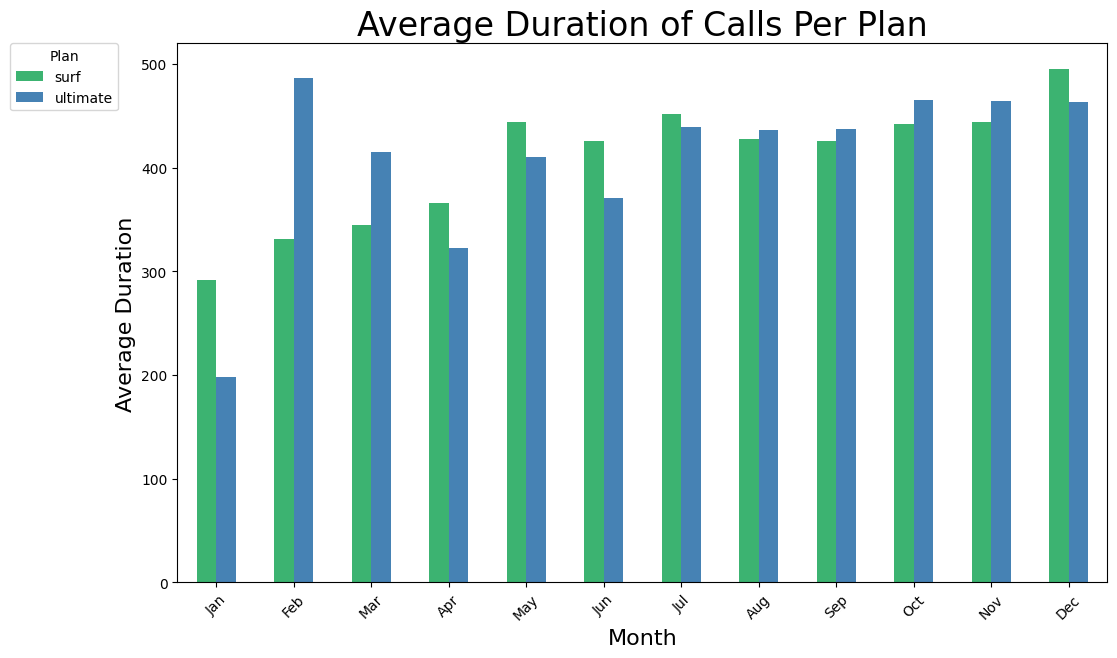

In [720]:
# Plot graph
fig, ax = plt.subplots(figsize=(12, 7))

# Define a list of hex colors
colors = ['#3CB371','#4682B4']

ax = pivot_df.plot(kind='bar', ax=ax, color=colors)

plt.xlabel("Month", size=16)
plt.ylabel("Average Duration", size=16)
plt.title("Average Duration of Calls Per Plan", size = 24)

#Rotate the x labels
plt.xticks(rotation=45)

# Adjust legend to be just outside the upper left of the plot area
plt.legend(title='Plan', bbox_to_anchor=(-0.18, 1), loc='upper left', borderaxespad=0.)

#plt.tight_layout()
plt.show()

<div class="alert alert-info"><font color='hotpink'>
<b>Calls</b>
<br>
<br>
- <b>To compare the average duration of calls, per each plan, per each month: </b>
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I grouped the merged_revenue dataframe, by 'month_abbr' and 'plan', and used the .mean method to get the average duration.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I pivoted the calls_avg_duration dataframe to make it easier to plot on to a graph.
<br>
<br>
- <b>To create the bar plot, to compare this data:: </b>
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I imported pyplot and added that to the top of the project, up above.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I used figsize to make the graph a little larger, because the legend was displaying on top of some of the bars.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I created some custom hex colors, then used those colors for the graph, using the 'color' parameter.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I increased the size of the font for the labels and the title.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I rotated the xlabels using xticks.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I used legend to customize the legend, to make the legend title uppercase. I used bbox_to_anchor to make the legend appear on the left.
</font color></div>

In [722]:
show_html_output(f"Compare the number of minutes, users of each plan require, each month.")

In [723]:
# Groupby 'month', 'plan', 'user_id' and get total of minutes of calls.
calls_sum_duration = merged_revenue.groupby(['month_abbr', 'plan', 'user_id'], observed='True')['duration'].sum().reset_index()
print(calls_sum_duration) 

     month_abbr      plan  user_id  duration
0           Jan      surf     1362       292
1           Jan  ultimate     1077       290
2           Jan  ultimate     1196       287
3           Jan  ultimate     1214        16
4           Feb      surf     1099        39
...         ...       ...      ...       ...
1754        Dec  ultimate     1477       289
1755        Dec  ultimate     1478       376
1756        Dec  ultimate     1482        56
1757        Dec  ultimate     1487       416
1758        Dec  ultimate     1497       300

[1759 rows x 4 columns]


In [724]:
calls_sum_duration.columns

Index(['month_abbr', 'plan', 'user_id', 'duration'], dtype='object')

In [725]:
# Now group by 'month_abbr' and 'plan' to get the total duration per plan per month
month_plan_summary = calls_sum_duration.groupby(['month_abbr', 'plan'], observed='True')['duration'].sum().reset_index(name='total_duration')
print(month_plan_summary.head(8))

  month_abbr      plan  total_duration
0        Jan      surf             292
1        Jan  ultimate             593
2        Feb      surf            1656
3        Feb  ultimate            2434
4        Mar      surf            5519
5        Mar  ultimate            2907
6        Apr      surf           12818
7        Apr  ultimate            5164


In [726]:
# Suppress specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

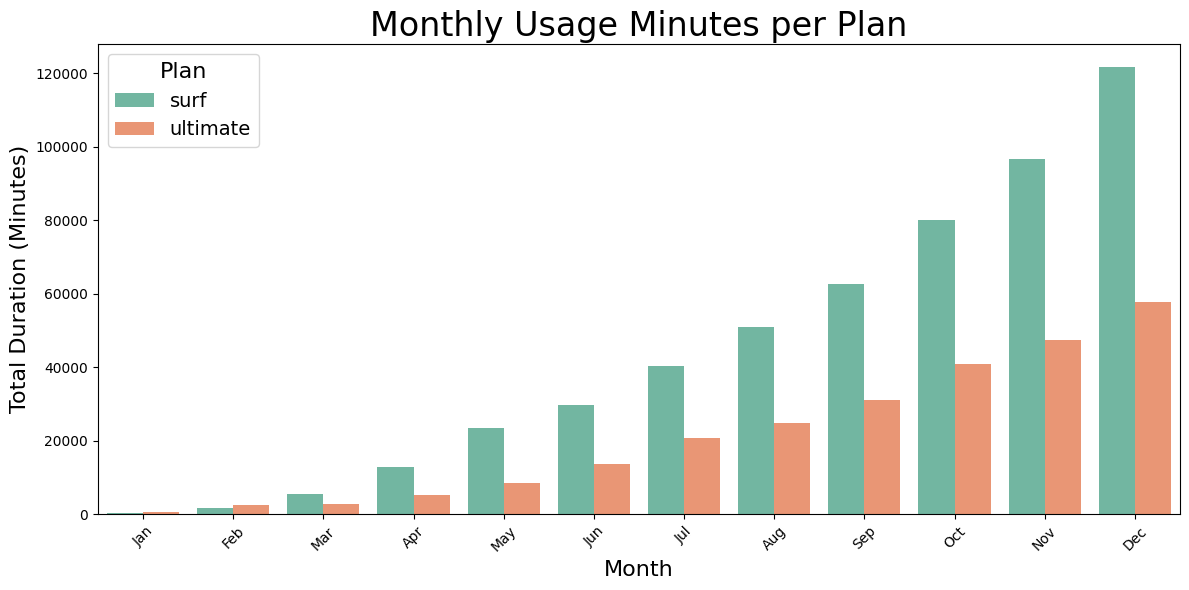

In [727]:
# Plotting the grouped data
plt.figure(figsize=(12, 6))

sns.barplot(data=month_plan_summary, x='month_abbr', y='total_duration', hue='plan', palette='Set2')

# Set titles and labels
plt.title('Monthly Usage Minutes per Plan', size=24)
plt.xlabel('Month', size=16)
plt.ylabel('Total Duration (Minutes)', size=16)

plt.xticks(rotation=45)

# Adjust the legend position and size
plt.legend(title='Plan', loc='upper left', fontsize=14, title_fontsize='16')
plt.tight_layout()

plt.show()

In [728]:
# reset the warning filter back to default afterward
warnings.simplefilter(action='default', category=FutureWarning)

<div class="alert alert-info"><font color='hotpink'>
<b>To compare the number of minutes, users of each plan require, each month.: </b>
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I created a dataframe with these columns ...'month_abbr', 'plan', 'user_id' and got a total of minutes of calls, using the .sum method.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I grouped by 'month_abbr' and 'plan' which got rid of the user_id column
<br>
<br>
<b>To plot this on a bar graph: </b>
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I used figsize to create a larger graph.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I plotted the months on the x axis.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I used the 'hue' parameter to add color to the 'plan' data, to separate the surf plan from the ultimate plan.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I used kde=False so that the extra line graph will not appear on top of the bar graph.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I used the rotation parameter, of xticks, to rotate the labels for the x axis.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I imported warnings module, and added that up above, at the top of the project.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;Warnings(not errors) were printing out about the groupby function. I used warnings.simplefilter method, with the action='ignore' parameter, to ignore future warnings.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I used the action='default' parameter, on the warnings.simplefilter, to set the filter back to default.
</font color></div>

In [730]:
show_html_output(f"Calculate the mean and the variance of the monthly call duration")

In [731]:
# Group by 'month' and 'plan' to get the total duration per month for each plan
month_plan_sum = calls_sum_duration.groupby(['month_abbr', 'plan'], observed='True')['duration'].sum().reset_index()
print()
print("Summary group by 'month' and 'plan':")
print()
display(month_plan_sum.head(8))
print()


Summary group by 'month' and 'plan':



month_abbr      plan  duration
0        Jan      surf       292
1        Jan  ultimate       593
2        Feb      surf      1656
3        Feb  ultimate      2434
4        Mar      surf      5519
5        Mar  ultimate      2907
6        Apr      surf     12818
7        Apr  ultimate      5164

In [732]:
# Group by 'month_abbr' and 'plan' to get the total duration per month for each plan, then sort by 'month_abbr'. Suppress warnings.
month_plan_sum = calls_sum_duration.groupby(['month_abbr', 'plan'], observed=True)['duration'].sum().reset_index()
print(month_plan_sum)

   month_abbr      plan  duration
0         Jan      surf       292
1         Jan  ultimate       593
2         Feb      surf      1656
3         Feb  ultimate      2434
4         Mar      surf      5519
5         Mar  ultimate      2907
6         Apr      surf     12818
7         Apr  ultimate      5164
8         May      surf     23531
9         May  ultimate      8614
10        Jun      surf     29786
11        Jun  ultimate     13724
12        Jul      surf     40237
13        Jul  ultimate     20663
14        Aug      surf     50917
15        Aug  ultimate     24877
16        Sep      surf     62625
17        Sep  ultimate     31069
18        Oct      surf     80065
19        Oct  ultimate     40923
20        Nov      surf     96782
21        Nov  ultimate     47335
22        Dec      surf    121787
23        Dec  ultimate     57912


In [733]:
# Rename the 'duration' column to 'Total_duration'
month_plan_sum = month_plan_sum.rename(columns={'duration': 'Total_duration'})

In [734]:
# separate each plan
surf_plan = month_plan_sum[month_plan_summary['plan'] == 'surf']
ultimate_plan = month_plan_sum[month_plan_summary['plan'] == 'ultimate']
display(surf_plan.head(3))

month_abbr  plan  Total_duration
0        Jan  surf             292
2        Feb  surf            1656
4        Mar  surf            5519

In [735]:
# Mean and variance for 'surf' plan
surf_mean = round(surf_plan['Total_duration'].mean(), 2)
surf_variance = round(surf_plan['Total_duration'].var(), 2)

# Calculate the standard deviation for surf plan
surf_std_dev = round(surf_plan['Total_duration'].std(), 2)

In [736]:
# Mean and variance for 'ultimate' plan
ultimate_mean = round(ultimate_plan['Total_duration'].mean(), 2)
ultimate_variance = round(ultimate_plan['Total_duration'].var(), 2)

# Calculate the standard deviation for ultimate plan
ultimate_std_dev = round(ultimate_plan['Total_duration'].std(), 2)

In [737]:
show_html_output(f"Surf Plan - Mean Duration: {surf_mean}, Variance: {surf_variance}")
show_html_output(f"Ultimate Plan - Mean Duration: {ultimate_mean}, Variance: {ultimate_variance}")

In [738]:
print(f"Surf Plan - Standard Deviation:  {surf_std_dev}")
print(f"Ultimate Plan - Standard Deviation:  {ultimate_std_dev}")

Surf Plan - Standard Deviation:  39684.59
Ultimate Plan - Standard Deviation:  19338.22


In [739]:
show_html_output(f"The variance is a statistical measure of the dispersion (how spread out the values are) in a dataset. It quantifies the degree to which each number in the dataset differs from the mean (average) value of the dataset.")

<div class="alert alert-info"><font color='hotpink'>
<b>To calculate the mean, and the variance of the monthly call duration: </b>
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I created a dataframe with these columns ...'month_abbr', 'plan',  to get the total duration per month, for each plan
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I grouped by 'month_abbr' and 'plan' which got rid of the user_id column
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I grouped by 'month_abbr' and 'plan' to get the total duration per month for each plan.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I then sort by 'month_abbr'. I used observed=True, in the groupby method to suppress warnings.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I renamed the 'duration' column to 'Total_duration'
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I separated the surf plan data from the ultimate plan data, to make it easier to get the mean of each.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I used .mean() method, on each plan, to get the mean of the total duration of calls per month.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I used .var() method, on each plan, to get the variance from the mean.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I also got the standard deviation, for the total call duration, for each plan. This made it easier to visualize how far the data was from the mean, because the standard deviation number was smaller than the variance number.
-</font color></div>

In [741]:
show_html_output(f"By looking at the mean, vs variance, for each plan, the customers on the surf plan talk more minutes than those on the ultimate plan. But, the variance is greater with the customers on the ultimate plan.")

In [742]:
# Plot a boxplot to visualize the distribution of the monthly call duration

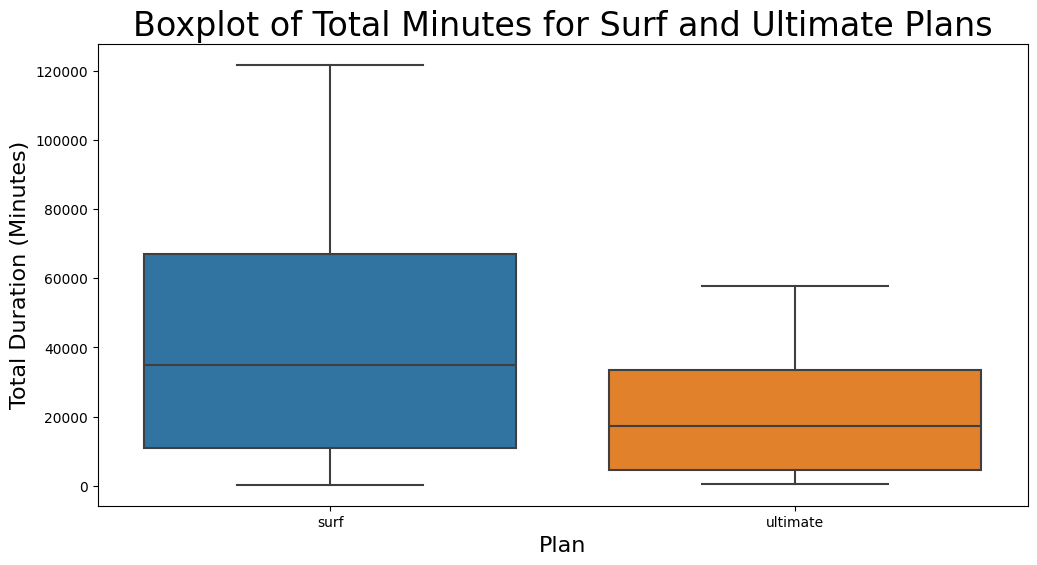

In [743]:
# Boxplot, with both plans
plt.figure(figsize=(12, 6))

sns.boxplot(data=month_plan_sum, x='plan', y='Total_duration')

plt.title('Boxplot of Total Minutes for Surf and Ultimate Plans', size =24)
plt.xlabel('Plan', size=16)
plt.ylabel('Total Duration (Minutes)', size=16)

plt.show()

In [744]:
show_html_output(f"Yes. The behavior of customers is different between the Surf and Ultimate plans.")

In [745]:
show_html_output(f"The horizontal line, in the middle of the box represents the median. The users of the Surf plan talk more minutes, and also have a wider distribution spread than the users of the Ultimate plan. The Surf plan users also had more outliers than the users of the Ultimate plan.")

### <span style="color: hotpink;">Messages</span>

In [747]:
show_html_output(f"Compare the number of messages users of each plan tend to send each month.")

In [748]:
display(merged_revenue['Total_messages'].head(8))

0    11
1    30
2    44
3    53
4    36
5    44
6    15
7    32
Name: Total_messages, dtype: int64

In [749]:
# Create a dataframe that just has 'Total_messages' ,  'month', 'plan', and 'user_id'
# Get the sum of messages for each user_id

tot_msg_df = merged_revenue.groupby(['month_abbr', 'plan','user_id'], observed='True')['Total_messages'].sum().reset_index()
display(tot_msg_df.head(5))

month_abbr      plan  user_id  Total_messages
0        Jan      surf     1362              21
1        Jan  ultimate     1077              37
2        Jan  ultimate     1196              23
3        Jan  ultimate     1214               2
4        Feb      surf     1099               3

In [750]:
# Group by 'month_abbr' and 'plan' to get the average number of messages sent per month for each plan
avg_msg_df = tot_msg_df.groupby(['month_abbr', 'plan'], observed='True')['Total_messages'].mean().reset_index()
display(avg_msg_df.head(5))

month_abbr      plan  Total_messages
0        Jan      surf       21.000000
1        Jan  ultimate       20.666667
2        Feb      surf       21.600000
3        Feb  ultimate       27.800000
4        Mar      surf       21.937500

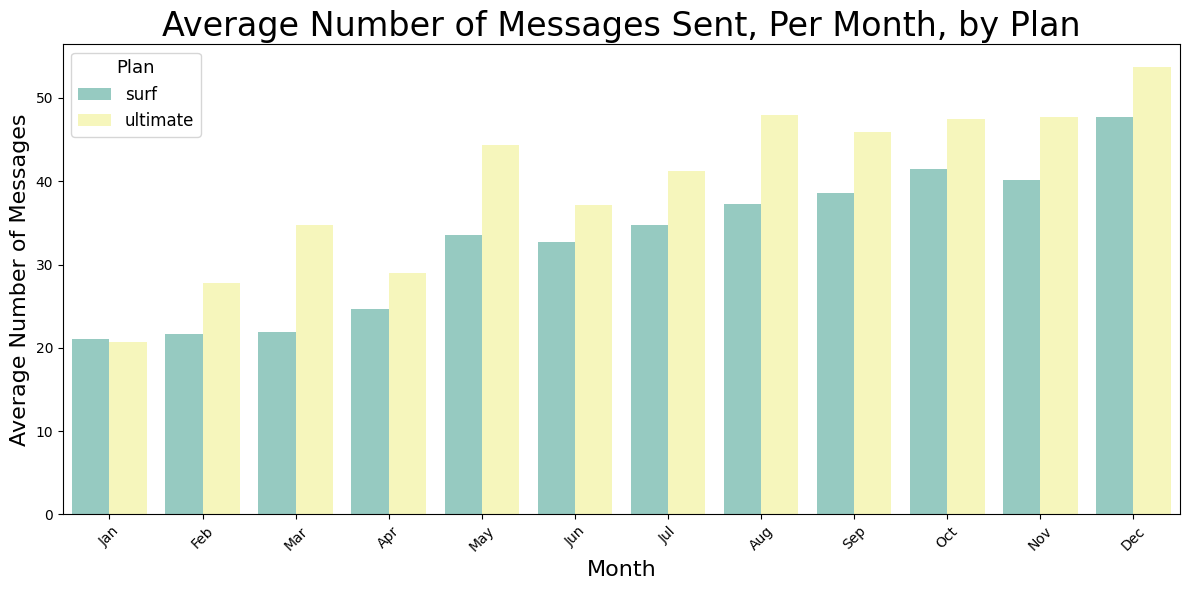

In [751]:
# Suppress specific FutureWarning
warnings.filterwarnings('ignore', category=FutureWarning)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_msg_df, x='month_abbr', y='Total_messages', hue='plan', palette='Set3')

# Set titles and labels
plt.title('Average Number of Messages Sent, Per Month, by Plan', size=24)
plt.xlabel('Month', size=16)
plt.ylabel('Average Number of Messages', size=16)

# Adjustments for better readability
plt.legend(title='Plan', loc='upper left',fontsize='large', title_fontsize='13')
plt.xticks(rotation=45)
plt.tight_layout()

In [752]:
show_html_output(f"January is the only month where both plans have the same amount of text messages. The rest of the months, the Ultimate plan has more messages, each month. Both plans progressively have more text messaging, as the year goes on, with December having the most messages, for both plans.")

<div class="alert alert-info"><font color='hotpink'>
<b>Messages</b>
<br>
<br>
<b>To compare the number of messages users of each plan tend to send each month: </b>
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I created a dataframe with these columns ...'Total_messages' ,  'month', 'plan', and 'user_id'.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I used .sum to get the total of messages.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I used observed=True, in the groupby method to suppress warnings.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I grouped by 'month_abbr' and 'plan', and used .mean method to get the average number of messages sent per month for each plan
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I created a bar plot, with 'month_abbr' on the x-axis, and 'Total_messages' on the y-axis.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I used the "hue" parameter to color the bars according to their plan ("surf" or "ultimate").
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I created a legend, and used the loc parameter to move the legend to the upper left, so that it would not be on top of bars.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I used the rotation parametere, in xticks, to rotate the month labels, on the x-axis, so that they would be easier to read.
-</font color></div>

In [754]:
show_html_output(f"Compare the amount of internet traffic consumed by users per plan:")

### <span style="color: hotpink;">Internet</span>

In [756]:
display(merged_revenue['gb_used'].head(8))

0     2.0
1     7.0
2    14.0
3    23.0
4    19.0
5    20.0
6     7.0
7    20.0
Name: gb_used, dtype: float64

In [757]:
# Create a dataframe that just has 'gb_used' ,  'month', 'plan', and 'user_id'
# Get the sum of GB used, for each user_id

tot_gb_df = merged_revenue.groupby(['month_abbr', 'plan','user_id'], observed='True')['gb_used'].sum().reset_index()
display(tot_gb_df.head(5))

month_abbr      plan  user_id  gb_used
0        Jan      surf     1362      8.0
1        Jan  ultimate     1077     11.0
2        Jan  ultimate     1196      9.0
3        Jan  ultimate     1214      2.0
4        Feb      surf     1099      1.0

In [758]:
show_html_output(f"Pivot to visualize it better.")

In [759]:
# Check for duplicates before pivoting
print("Checking for duplicates in tot_gb_df:")
duplicate_gb_check = tot_gb_df.duplicated(subset=['month_abbr', 'plan'])
print(tot_gb_df[duplicate_gb_check])

Checking for duplicates in tot_gb_df:
     month_abbr      plan  user_id  gb_used
2           Jan  ultimate     1196      9.0
3           Jan  ultimate     1214      2.0
5           Feb      surf     1138     17.0
6           Feb      surf     1261      8.0
7           Feb      surf     1362     11.0
...         ...       ...      ...      ...
1754        Dec  ultimate     1477     28.0
1755        Dec  ultimate     1478     23.0
1756        Dec  ultimate     1482      1.0
1757        Dec  ultimate     1487     14.0
1758        Dec  ultimate     1497     12.0

[1735 rows x 4 columns]


In [760]:
# create a summary DataFrame that removes duplicates
summary_gb_df = tot_gb_df.groupby(['month_abbr', 'plan'], observed=True)['gb_used'].sum().reset_index()
print("Summary DataFrame without User IDs:")
print(summary_gb_df)

Summary DataFrame without User IDs:
   month_abbr      plan  gb_used
0         Jan      surf      8.0
1         Jan  ultimate     22.0
2         Feb      surf     49.0
3         Feb  ultimate     89.0
4         Mar      surf    205.0
5         Mar  ultimate    171.0
6         Apr      surf    430.0
7         Apr  ultimate    234.0
8         May      surf    815.0
9         May  ultimate    366.0
10        Jun      surf   1122.0
11        Jun  ultimate    590.0
12        Jul      surf   1534.0
13        Jul  ultimate    796.0
14        Aug      surf   2097.0
15        Aug  ultimate   1058.0
16        Sep      surf   2497.0
17        Sep  ultimate   1205.0
18        Oct      surf   3233.0
19        Oct  ultimate   1582.0
20        Nov      surf   3666.0
21        Nov  ultimate   1819.0
22        Dec      surf   4537.0
23        Dec  ultimate   2349.0


In [761]:
# Pivot the dataframe for easier plotting
pivot_gb_df = summary_gb_df.pivot(index='month_abbr', columns='plan', values='gb_used')
print("Pivoted DataFrame:")
print(pivot_gb_df)

Pivoted DataFrame:
plan          surf  ultimate
month_abbr                  
Jan            8.0      22.0
Feb           49.0      89.0
Mar          205.0     171.0
Apr          430.0     234.0
May          815.0     366.0
Jun         1122.0     590.0
Jul         1534.0     796.0
Aug         2097.0    1058.0
Sep         2497.0    1205.0
Oct         3233.0    1582.0
Nov         3666.0    1819.0
Dec         4537.0    2349.0


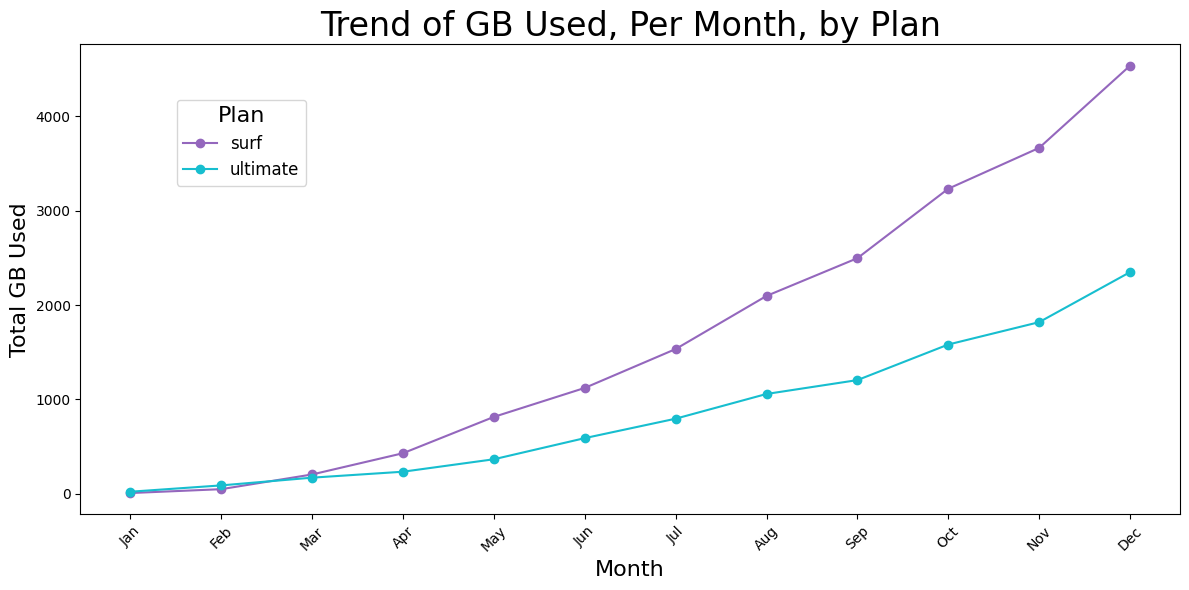

In [762]:
# Line Chart

# Define a custom color cycle. Purple and teal.
custom_cycler = cycler(color=['#9467bd', '#17becf']) 

fig, ax = plt.subplots(figsize=(12, 6))

# Apply the custom color cycle to the axes
ax.set_prop_cycle(custom_cycler)

# Plot the data
pivot_gb_df.plot(ax=ax, kind='line', marker='o')

# Set title and labels with font size
ax.set_title('Trend of GB Used, Per Month, by Plan', size=24)
ax.set_xlabel('Month', size=16)
ax.set_ylabel('Total GB Used', size=16)

# Set x-ticks to include all months
ax.set_xticks(range(len(month_order)))
ax.set_xticklabels(month_order, rotation=45)

# Add legend in upper left
ax.legend(title='Plan', 
          bbox_to_anchor=(0.08, .9), 
          loc='upper left', 
          fontsize=12,
          title_fontsize=16)

# Adjust layout for better readability
plt.tight_layout()
plt.show()

In [763]:
show_html_output(f"Yes, the customers' GB usage is different, for the two plans.")

In [764]:
show_html_output(f"The usage of GB, per plan, are almost exactly the same for the first 2 months of the year. At the beginning of March, through the end of the year, customers on the Surf plan use a lot more GB's than the customers on the Ultimate plan. At the end of the year, in December, the GB usage, for Surf plan customers, is about double that of the Ultimate plan customers, for December.")

<div class="alert alert-info"><font color='hotpink'>
<b>Internet</b>
<br>
<br>
<b>To compare the amount of internet traffic consumed by users per plan: </b>
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I created a dataframe with these columns ...'gb_used' ,  'month', 'plan', and 'user_id', so that I could get the sum usage, of GB's, for each user.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I used .sum to get the total of GB.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I used the .pivot method, to pivot the table, from 'month', 'plan', 'gb_used', to 'month', 'surf', 'ultimate'. (the gb_used column was dropped) The surf and ultimate columns hold the GB's per month.
<br>
<br>
<b>To create a line chart:</b>
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I used 'ax', on the line chart, so that I would have access to more customized aspects of the graph.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I imported cycler, up above, at the top of the project. I created custom colors, using cycler and ax.set_prop_cycle.
<br>  
- &nbsp;&nbsp;&nbsp;&nbsp;I used figsize to make the graph bigger.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I used the 'marker' parameter to make little dots for where my data is.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I used the 'kind' parameter to choose the 'line' type of graph. 
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I used set_xticks to change the x axis labels to be the range of Jan-Dec, using a variable that was created earlier in the project.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I used the 'rotation' parameter, from set_xticklabels to rotate the x labels, so that the months would be easier to read.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I created a legend, using 'loc' parameter to put the legend in the upper left corner. And then used bbox_to_anchor to nudge the legend over to the right a bit.
</font color></div>

### <span style="color: hotpink;">Revenue</span>

In [767]:
display(merged_revenue.sample(5))
merged_revenue.columns

user_id  month  call_count  duration  Total_messages  gb_used      plan  \
11      1004      6          44       275              18     21.0      surf   
255     1077      4          95       746              57     17.0  ultimate   
1128    1313     12          93       640              44     13.0      surf   
1265    1347     11          62       425              71     24.0  ultimate   
1540    1432     11         102       718              13     19.0  ultimate   

      is_ny_nj  msg_included  gb_included  min_included  monthly_fee  \
11       False            50           15           500           20   
255      False          1000           30          3000           70   
1128     False            50           15           500           20   
1265     False          1000           30          3000           70   
1540     False          1000           30          3000           70   

      fee_per_gb  fee_per_msg  fee_per_min  total_revenue month_abbr  
11            10         0.03         0.03           80.0        Jun  
255            7         0.01         0.01           70.0        Apr  
1128          10         0.03         0.03           24.2        Dec  
1265           7         0.01         0.01           70.0        Nov  
1540           7         0.01         0.01           70.0        Nov

Index(['user_id', 'month', 'call_count', 'duration', 'Total_messages',
       'gb_used', 'plan', 'is_ny_nj', 'msg_included', 'gb_included',
       'min_included', 'monthly_fee', 'fee_per_gb', 'fee_per_msg',
       'fee_per_min', 'total_revenue', 'month_abbr'],
      dtype='object')

In [768]:
show_html_output("Total revenue, Surf vs Ultimate plans:")

In [769]:
# Create new columns for Surf and Ultimate plan revenues
merged_revenue['surf_total_revenue'] = merged_revenue.apply(
    lambda row: row['total_revenue'] if row['plan'] == 'surf' else 0, axis=1)
merged_revenue['ultimate_total_revenue'] = merged_revenue.apply(
    lambda row: row['total_revenue'] if row['plan'] == 'ultimate' else 0, axis=1)

In [770]:
display(merged_revenue.sample(n=10))

user_id  month  call_count  duration  Total_messages  gb_used      plan  \
1157    1324      6         138      1033             124     21.0      surf   
16      1004     11          54       476              25     22.0      surf   
1283    1354     12          89       544              44     19.0  ultimate   
212     1064     12          62       438              26     19.0      surf   
759     1209     12         111       682              26     23.0      surf   
293     1084     10          29       233              36      8.0      surf   
299     1088      5           3        22               8      3.0  ultimate   
281     1082      4          32       190              15      7.0      surf   
315     1091     10          42       311              35      4.0  ultimate   
1073    1295      9          79       618              23     18.0      surf   

      is_ny_nj  msg_included  gb_included  min_included  monthly_fee  \
1157     False            50           15           500           20   
16       False            50           15           500           20   
1283      True          1000           30          3000           70   
212       True            50           15           500           20   
759      False            50           15           500           20   
293      False            50           15           500           20   
299      False          1000           30          3000           70   
281      False            50           15           500           20   
315      False          1000           30          3000           70   
1073     False            50           15           500           20   

      fee_per_gb  fee_per_msg  fee_per_min  total_revenue month_abbr  \
1157          10         0.03         0.03          98.21        Jun   
16            10         0.03         0.03          90.00        Nov   
1283           7         0.01         0.01          70.00        Dec   
212           10         0.03         0.03          60.00        Dec   
759           10         0.03         0.03         105.46        Dec   
293           10         0.03         0.03          20.00        Oct   
299            7         0.01         0.01          70.00        May   
281           10         0.03         0.03          20.00        Apr   
315            7         0.01         0.01          70.00        Oct   
1073          10         0.03         0.03          53.54        Sep   

      surf_total_revenue  ultimate_total_revenue  
1157               98.21                     0.0  
16                 90.00                     0.0  
1283                0.00                    70.0  
212                60.00                     0.0  
759               105.46                     0.0  
293                20.00                     0.0  
299                 0.00                    70.0  
281                20.00                     0.0  
315                 0.00                    70.0  
1073               53.54                     0.0

In [771]:
show_html_output("Plotting the revenue for the two plans:")

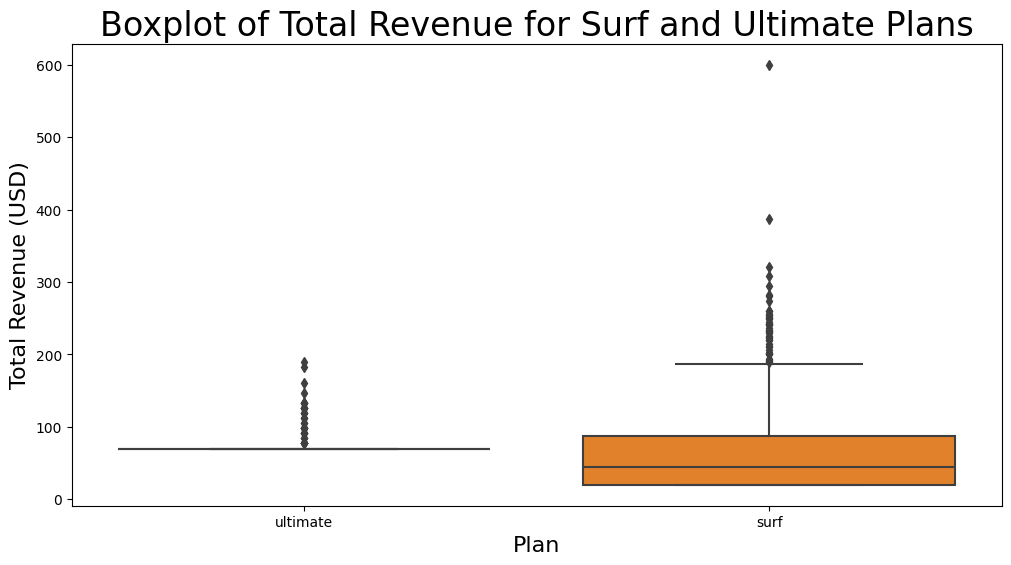

In [772]:
# Boxplot, with both plans
plt.figure(figsize=(12, 6))

sns.boxplot(data=merged_revenue, x='plan', y='total_revenue')

plt.title('Boxplot of Total Revenue for Surf and Ultimate Plans', size =24)
plt.xlabel('Plan', size=16)
plt.ylabel('Total Revenue (USD)', size=16)

plt.show()



In [773]:
show_html_output("The Ultimate plan has a slightly higher median revenue.  The distribution of revenue, for the Ultimate plan is smaller than that of the Surf plan. The Surf plan brings in more revenue, because the distribution is bigger, and also there are a more outliers.")

### Extra minutes $

In [775]:
show_html_output(f"Total revenue, for extra minutes, by plan, by month")

In [776]:
# Surf plan - min_included is equal to 500
# Ultimate plan - min_included is equal to 3000
# Define the extraMIN function to calculate extra minute revenue
def extraMIN(row):
    # Use min_included directly from the DataFrame column
    min_included = row['min_included']
    # Calculate the extra minute revenue if duration exceeds included minutes
    if row['duration'] > min_included:
        extra_min_revenue = (row['duration'] - min_included) * row['fee_per_min']
        return extra_min_revenue
    return 0

In [777]:
# Define the function to aggregate extra minute revenue per month
def calculate_extra_min_revenue_per_month(df):
    
    # Apply the extraMIN function row-wise to create a new column 'rev_extra_min'
    df['rev_extra_min'] = df.apply(extraMIN, axis=1)
    
    # Separate NY-NJ and non-NY-NJ users and aggregate extra minute revenue per month
    min_ny_nj_revenue = df[df['is_ny_nj']].groupby('month_abbr')['rev_extra_min'].sum().reset_index()
    min_non_ny_nj_revenue = df[~df['is_ny_nj']].groupby('month_abbr')['rev_extra_min'].sum().reset_index()

    
    
    return min_ny_nj_revenue, min_non_ny_nj_revenue

In [778]:
# Call the function to get the extra minute revenue per month for NY-NJ and non-NY-NJ users
ny_nj_extra_min_revenue, non_ny_nj_extra_min_revenue = calculate_extra_min_revenue_per_month(merged_revenue)

# Calculate the annual total for NY-NJ and non-NY-NJ users for extra minutes.
min_ny_nj_annual_total = ny_nj_extra_min_revenue['rev_extra_min'].sum()
min_non_ny_nj_annual_total = non_ny_nj_extra_min_revenue['rev_extra_min'].sum()

print("Extra minute revenue per month for NY-NJ users:")
print(ny_nj_extra_min_revenue)
print()

print("\nExtra minute revenue per month for non-NY-NJ users:")
print(non_ny_nj_extra_min_revenue)
print()

print("\nAnnual total extra minute revenue for NY-NJ users: $", min_ny_nj_annual_total.round(2))
print("Annual total extra minute revenue for non-NY-NJ users: $", min_non_ny_nj_annual_total.round(2))

Extra minute revenue per month for NY-NJ users:
   month_abbr  rev_extra_min
0         Jan           0.00
1         Feb           0.00
2         Mar           6.84
3         Apr           5.67
4         May          14.64
5         Jun          10.86
6         Jul          25.98
7         Aug          35.19
8         Sep          41.07
9         Oct         100.14
10        Nov          78.69
11        Dec         138.03


Extra minute revenue per month for non-NY-NJ users:
   month_abbr  rev_extra_min
0         Jan           0.00
1         Feb           9.33
2         Mar           9.42
3         Apr          42.42
4         May         101.16
5         Jun         102.81
6         Jul         180.12
7         Aug         179.94
8         Sep         184.38
9         Oct         247.35
10        Nov         337.71
11        Dec         545.31


Annual total extra minute revenue for NY-NJ users: $ 457.11
Annual total extra minute revenue for non-NY-NJ users: $ 1939.95


In [779]:
perc_min_NYNJ = round((457.11 / 1939.95 ) * 100, 2)
print(perc_min_NYNJ)

23.56


In [780]:
show_html_output(f"The annual revenue generated, for going over limits for minutes, for NY-NJ customers is smaller than that of non NY-NJ customers. However, the NY-NJ customers make up {perc_min_NYNJ:.2f}% of the total revenue for overage of minutes.")

### Extra messages $

In [782]:
show_html_output(f"Total revenue, for extra messages, by plan, by month:")

In [783]:
# Surf plan - msg_included is equal to 50
# Ultimate plan - msg_included is equal to 1000
# Define the extraMSG function to calculate extra messages revenue
def extraMSG(row):
    # Use msg_included directly from the merged_revenue dataFrame column
    msg_included = row['msg_included']
    
    # Calculate the extra messages revenue if messages exceeds included messages
    if row['Total_messages'] > msg_included:
        extra_msg_revenue = (row['Total_messages'] - msg_included) * row['fee_per_msg']
        return extra_msg_revenue
    return 0

In [784]:
# Define the function to aggregate extra messages revenue per month
def calculate_extra_msg_revenue_per_month(df):
    
    # Apply the extraMSG function row-wise to create a new column 'rev_extra_msg'
    df['rev_extra_msg'] = df.apply(extraMSG, axis=1)
    
    # Separate NY-NJ and non-NY-NJ users and aggregate extra messages revenue per month
    msg_ny_nj_revenue = df[df['is_ny_nj']].groupby('month_abbr')['rev_extra_msg'].sum().reset_index()
    msg_non_ny_nj_revenue = df[~df['is_ny_nj']].groupby('month_abbr')['rev_extra_msg'].sum().reset_index()

    
    
    return msg_ny_nj_revenue, msg_non_ny_nj_revenue

In [785]:
# Call the function to get the extra messages revenue per month for NY-NJ and non-NY-NJ users
ny_nj_extra_msg_revenue, non_ny_nj_extra_msg_revenue = calculate_extra_msg_revenue_per_month(merged_revenue)

# Calculate the annual total for NY-NJ and non-NY-NJ users
msg_ny_nj_annual_total = ny_nj_extra_msg_revenue['rev_extra_msg'].sum()
msg_non_ny_nj_annual_total = non_ny_nj_extra_msg_revenue['rev_extra_msg'].sum()

print("Extra messages revenue per month for NY-NJ users:")
print(ny_nj_extra_msg_revenue)
print()

print("\nExtra messages revenue per month for non-NY-NJ users:")
print(non_ny_nj_extra_msg_revenue)
print()

print("\nAnnual total extra messages revenue for NY-NJ users: $", msg_ny_nj_annual_total.round(2))
print("Annual total extra messages revenue for non-NY-NJ users: $", msg_non_ny_nj_annual_total.round(2))

Extra messages revenue per month for NY-NJ users:
   month_abbr  rev_extra_msg
0         Jan           0.00
1         Feb           0.00
2         Mar           0.00
3         Apr           0.00
4         May           0.00
5         Jun           0.00
6         Jul           0.15
7         Aug           5.13
8         Sep           8.91
9         Oct          14.73
10        Nov          12.24
11        Dec          20.10


Extra messages revenue per month for non-NY-NJ users:
   month_abbr  rev_extra_msg
0         Jan           0.00
1         Feb           0.24
2         Mar           0.39
3         Apr           2.61
4         May           9.63
5         Jun          12.00
6         Jul          14.52
7         Aug          21.33
8         Sep          23.58
9         Oct          39.45
10        Nov          42.78
11        Dec          75.84


Annual total extra messages revenue for NY-NJ users: $ 61.26
Annual total extra messages revenue for non-NY-NJ users: $ 242.37


In [786]:
perc_msg_NYNJ = round((61.26 / 242.37 ) * 100, 2)
print(perc_msg_NYNJ)

25.28


In [787]:
show_html_output(f"The annual revenue generated, for going over limits for messages, for NY-NJ customers is smaller than that of non NY-NJ customers. However, the NY-NJ customers make up {perc_msg_NYNJ:.2f}% of the total revenue for overage of messages.")

### Extra GB $

In [789]:
show_html_output(f"Total revenue, for extra GB, by plan, by month:")

In [790]:
# Surf plan - gb_included is equal to 15
# Ultimate plan - gb_included is equal to 30
# Define the extraGB function to calculate extra gb revenue
def extraGB(row):
    # Use gb_included directly from the merged_revenue DataFrame column
    gb_included = row['gb_included']
    
    # Calculate the extra GB revenue if duration exceeds included GB
    if row['gb_used'] > gb_included:
        extra_gb_revenue = (row['gb_used'] - gb_included) * row['fee_per_gb']
        return extra_gb_revenue
    return 0

In [791]:
# Define the function to aggregate extra GB revenue per month
def calculate_extra_GB_revenue_per_month(df):
    
    # Apply the extraGB function row-wise to create a new column 'rev_extra_GB'
    df['rev_extra_gb'] = df.apply(extraGB, axis=1)
    
    # Separate NY-NJ and non-NY-NJ users and aggregate extra GB revenue per month
    gb_ny_nj_revenue = df[df['is_ny_nj']].groupby('month_abbr')['rev_extra_gb'].sum().reset_index()
    gb_non_ny_nj_revenue = df[~df['is_ny_nj']].groupby('month_abbr')['rev_extra_gb'].sum().reset_index()

    
    
    return gb_ny_nj_revenue, gb_non_ny_nj_revenue

In [792]:
# Call the function to get the extra GB revenue per month for NY-NJ and non-NY-NJ users
ny_nj_extra_gb_revenue, non_ny_nj_extra_gb_revenue = calculate_extra_GB_revenue_per_month(merged_revenue)

# Calculate the annual total for NY-NJ and non-NY-NJ users
gb_ny_nj_annual_total = ny_nj_extra_gb_revenue['rev_extra_gb'].sum()
gb_non_ny_nj_annual_total = non_ny_nj_extra_gb_revenue['rev_extra_gb'].sum()

print("Extra GB revenue per month for NY-NJ users:")
print(ny_nj_extra_gb_revenue)
print()

print("\nExtra GB revenue per month for non-NY-NJ users:")
print(non_ny_nj_extra_gb_revenue)
print()

print("\nAnnual total extra GB revenue for NY-NJ users: $", gb_ny_nj_annual_total.round(2))
print("Annual total extra GB revenue for non-NY-NJ users: $", gb_non_ny_nj_annual_total.round(2))

Extra GB revenue per month for NY-NJ users:
   month_abbr  rev_extra_gb
0         Jan           0.0
1         Feb           0.0
2         Mar         129.0
3         Apr         256.0
4         May         331.0
5         Jun         366.0
6         Jul         796.0
7         Aug        1403.0
8         Sep        1437.0
9         Oct        2346.0
10        Nov        2236.0
11        Dec        2127.0


Extra GB revenue per month for non-NY-NJ users:
   month_abbr  rev_extra_gb
0         Jan           0.0
1         Feb          20.0
2         Mar         251.0
3         Apr         520.0
4         May        1347.0
5         Jun        1978.0
6         Jul        3140.0
7         Aug        4192.0
8         Sep        4295.0
9         Oct        6181.0
10        Nov        6346.0
11        Dec       10236.0


Annual total extra GB revenue for NY-NJ users: $ 11427.0
Annual total extra GB revenue for non-NY-NJ users: $ 38506.0


In [793]:
perc_gb_NYNJ = round((11427.0 / 38506.0 ) * 100, 2)
print(perc_gb_NYNJ)

29.68


In [794]:
show_html_output(f"The annual revenue generated, for going over limits for GB, for NY-NJ customers is smaller than that of non NY-NJ customers. However, the NY-NJ customers make up {perc_gb_NYNJ:.2f}% of the total revenue for overage of GB.")

In [795]:
# Data for plotting
categories_extras = ['GB Revenue', 'Message Revenue', 'Minutes Revenue']
ny_nj_totals = [gb_ny_nj_annual_total, msg_ny_nj_annual_total, min_ny_nj_annual_total]
non_ny_nj_totals = [gb_non_ny_nj_annual_total, msg_non_ny_nj_annual_total, min_non_ny_nj_annual_total]

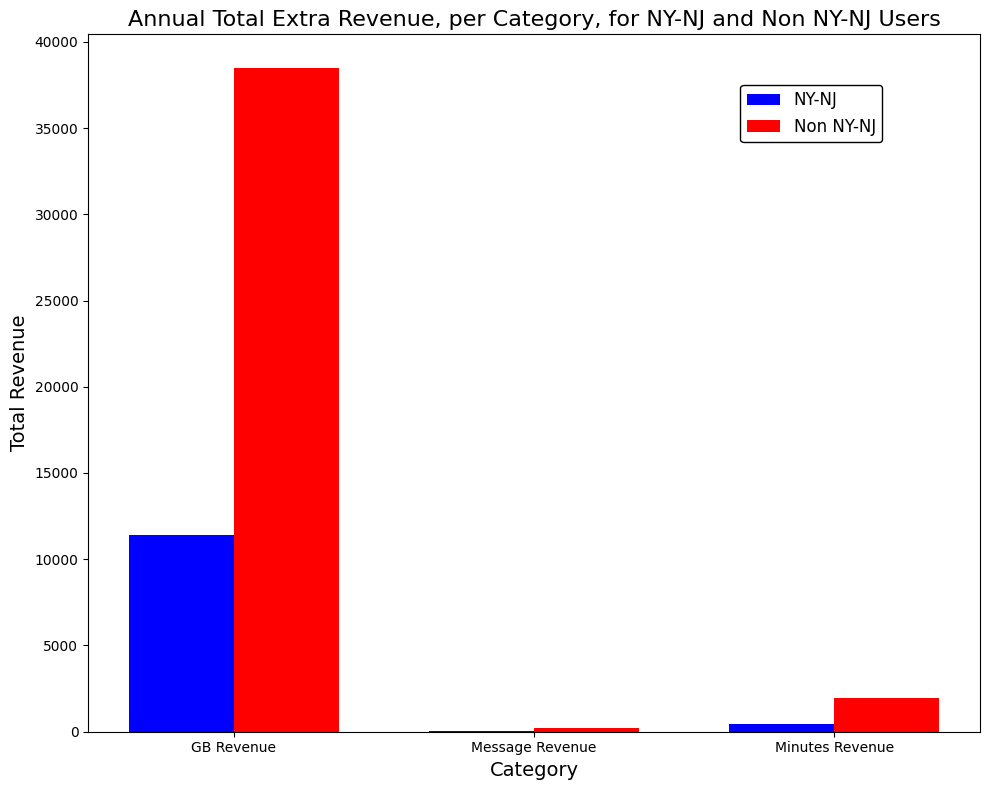

In [796]:
# Define the positions for the bars
x = np.arange(len(categories_extras))
width = 0.35

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot bars
bars1 = ax.bar(x - width/2, ny_nj_totals, width, label='NY-NJ', color='b')
bars2 = ax.bar(x + width/2, non_ny_nj_totals, width, label='Non NY-NJ', color='r')

# Add labels, title, and legend
ax.set_xlabel('Category', size=14)
ax.set_ylabel('Total Revenue', size=14)
ax.set_title('Annual Total Extra Revenue, per Category, for NY-NJ and Non NY-NJ Users', size=16)

ax.set_xticks(x)
ax.set_xticklabels(categories_extras)

ax.legend(fontsize=12, frameon=True, framealpha=1, edgecolor='black', bbox_to_anchor=(0.9, 0.94), loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

In [797]:
#There are 3 new columns on the far right.
display(merged_revenue.head(3))
merged_revenue.columns

user_id  month  call_count  duration  Total_messages  gb_used      plan  \
0    1000     12          16       124              11      2.0  ultimate   
1    1001      8          27       182              30      7.0      surf   
2    1001      9          49       315              44     14.0      surf   

   is_ny_nj  msg_included  gb_included  ...  fee_per_gb  fee_per_msg  \
0     False          1000           30  ...           7         0.01   
1     False            50           15  ...          10         0.03   
2     False            50           15  ...          10         0.03   

   fee_per_min  total_revenue  month_abbr  surf_total_revenue  \
0         0.01           70.0         Dec                 0.0   
1         0.03           20.0         Aug                20.0   
2         0.03           20.0         Sep                20.0   

  ultimate_total_revenue  rev_extra_min  rev_extra_msg  rev_extra_gb  
0                   70.0            0.0            0.0           0.0  
1                    0.0            0.0            0.0           0.0  
2                    0.0            0.0            0.0           0.0  

[3 rows x 22 columns]

Index(['user_id', 'month', 'call_count', 'duration', 'Total_messages',
       'gb_used', 'plan', 'is_ny_nj', 'msg_included', 'gb_included',
       'min_included', 'monthly_fee', 'fee_per_gb', 'fee_per_msg',
       'fee_per_min', 'total_revenue', 'month_abbr', 'surf_total_revenue',
       'ultimate_total_revenue', 'rev_extra_min', 'rev_extra_msg',
       'rev_extra_gb'],
      dtype='object')

<div class="alert alert-info"><font color='hotpink'>
<b>Revenue</b>
<br>
<br>
<b>Total revenue, for extra minutes, by plan, by month: </b>
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I created a extraMIN function to calculate the additional revenue generated from users going over their limit, according to their plan, for minutes.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;The extraMIN function takes one parameter, a row of a dataframe.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;In this function, I created a min_included variable to hold the amount of minutes that are included in the plan.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I then check to see if the actual minutes used, are greater than the minutes included, in their plan.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;If user has gone over their included minutes, I minus  minutes allowed, from their total minutes, then multiply that number by their plan's fee per extra minute.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I created a calculate_extra_min_revenue_per_month function that aggregates the total revenue generated, per month.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;This function also separates out the NY-NJ users vs the non NY-NJ users.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;This function calls the extraMIN function.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;The extraMIN function returns the revenue generated, back to this function. 
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;That number is added to a new column, called rev_extra_min, in the merged_revenue dataframe. 
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;This function then checks to see if is_ny_nj column, from the merged dataframe, is 'True'. 
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;If it is, it groups this filtered data, by month, sums the revenue generated by extra minutes. 
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;This data is added put in a dataframe called min_ny_nj_revenue, and the dataframe index is reset.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;If the is_ny_nj column is 'False', this would mean that the user is not from the NY-NJ area.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;The revenue generated by extra minutes is then summed, the rows are grouped by months, the index is reset.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;The rows are added to this min_non_ny_nj_revenue dataframe.  
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I used the ~ symbol, which means 'if it is True, then make it False', and vice versa.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I calculate the annual revenue from extra minutes total for NY-NJ and non-NY-NJ users, and print that out.
<br>
<br>
<b>Total revenue, for extra messages, by plan, by month:</b>
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I do the same thing, as finding revenue for extra minutes, doing a copy-n-paste of that code, except I changed all instances of min, to msg.
<br>
<br>
<b>Total revenue, for extra GB, by plan, by month:</b>
<br> 
- &nbsp;&nbsp;&nbsp;&nbsp;I do the same thing, as finding revenue for extra messages, doing a copy-n-paste of that code, except I changed all instances of msg, to gb.
<br>
<br>
<b>To create the double bar plot:</b>
<br> 
- &nbsp;&nbsp;&nbsp;&nbsp;One bar is representing the NY-NJ users, and the other bar representing the non NY-NJ users.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I created a list to hold the 3 categories of revenue generated from data overages.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I used the arange method to grab the length of the list, and create bars on the graph with a distance of 35% away from each other.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I used ax.bar to plot the bars, and use minus, and plus, to shift one bar to the left, and one bar to the right, so that they don't overlap vertically.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;xticks is set to x, which is 3.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;Using legend, and used loc, I positioned the legend in the upper right corner. I used bbox_to_anchor=(0.9, 0.94) to nudge the legend over to the left.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I used tight_layout to make sure that there was padding around the graph, so it will look good visually.


In [799]:
# Select only these columns user_id, month, total_revenue
filtered_revenue_by_plan = merged_revenue[['user_id', 'month_abbr', 'total_revenue', 'plan']]

# Sort by 'total_revenue' and 'user_id'
sorted_revenue = filtered_revenue_by_plan.sort_values(by=['total_revenue', 'plan'],ascending=False)

# Display the result
display(sorted_revenue.head(15))
#print(sorted_revenue.sample(5))

user_id month_abbr  total_revenue  plan
1377    1379        Dec         600.37  surf
856     1240        Aug         387.85  surf
858     1240        Oct         320.82  surf
860     1240        Dec         308.57  surf
1014    1272        Dec         294.14  surf
997     1267        Dec         282.55  surf
1602    1447        Nov         280.54  surf
1066    1293        Oct         273.51  surf
1002    1268        Jul         260.63  surf
734     1201        Nov         260.00  surf
1178    1328        Jul         255.51  surf
23      1007        Oct         254.62  surf
1603    1447        Dec         253.39  surf
1363    1374        Aug         250.63  surf
1001    1268        Jun         250.00  surf

In [800]:
merged_revenue['total_revenue'].describe()

count    1759.000000
mean       66.380722
std        46.144077
min        20.000000
25%        30.000000
50%        70.000000
75%        70.000000
max       600.370000
Name: total_revenue, dtype: float64

 <h2 style="color: red;">Test hypothesis on revenue for Surf vs Ultimate:</h2>

In [802]:
# Separate the revenue data by plan
surf_revenue = merged_revenue[merged_revenue['plan'] == 'surf']['total_revenue']
ultimate_revenue = merged_revenue[merged_revenue['plan'] == 'ultimate']['total_revenue']

In [803]:
show_html_output("Null Hypothesis (H₀):  'The average revenue, from users of the Surf and Ultimate calling plans. is the same.'")

In [804]:
show_html_output("Alternative Hypothesis (H₀): 'The average revenue from users of the Ultimate and Surf calling plans is different.'")

In [805]:
# 0.05 is the standard alpha
alpha = 0.05

In [806]:
# test the hypothesis that the means of the two independent populations are equal
results = st.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)

In [807]:
# print the p-value
print('p-value:', results.pvalue)

p-value: 4.0737556022746826e-08


In [808]:
#Compare the pvalue to alpha
if results.pvalue <= alpha:
    show_html_output("We reject the null hypothesis.")
else:
    show_html_output("We can't reject the null hypothesis.")

<div class="alert alert-info"><font color='hotpink'>
<b>To Test the hypothesis on revenue for Surf vs Ultimate plans:</b>
<br>
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I imported stats, import scipy.stats as st , placing that up above at the top of the project.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I created two variables. One for the total revenue of the Surf plan, and one for the total revenue of the Ultimate plan.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I ran st.ttest_ind, because I wanted to compare two datasets(the total revenue for the Surf plan, and the total revenue for the Ultimate plan).
<br>
<br>
<br>
<b>Null Hypothesis (H₀): "The average revenue, from users of the Ultimate and Surf calling plans, is the same."</b>
<br>
<br>
 <br>
<b>Alternative Hypothesis (H₀): "The average revenue from users of the Ultimate and Surf calling plans is different."</b>
<br>
<br>
<br>
<b>Reject hypothesis?:</b>
<br>
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;Because of the e-08, at the end of the p-value, the decimal moves over, to the left, 8 places, making this p-value a tiny number.
<br>
<br>
<b>Decision rule : </b>
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;If p-value < α, reject the null hypothesis.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;If p-value >= α, fail to reject the null hypothesis.
<br>
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;Since the p-value is < a , which is .05,then we REJECT THE NULL HYPOTHESIS.  This means that the revenue generated, from the two calling plans, 
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;is NOT the same.


 <h2 style="color: red;">Test hypothesis on NY-NJ vs non NY-NJ average revenue:</h2>

In [811]:
#Get the average revenue
# Calculate average revenue per user. Divide by 12 , for how many months in the year 2018.
merged_revenue['avg_revenue'] = merged_revenue['total_revenue'] / 12
print(merged_revenue['avg_revenue'].head(3))

0    5.833333
1    1.666667
2    1.666667
Name: avg_revenue, dtype: float64


In [812]:
# Separate the revenue data by NY-NJ vs non NY-NJ

# Create the new column 'ny_nj_avg_rev' containing average revenue for NY-NJ users
merged_revenue['ny_nj_avg_rev'] = np.where(merged_revenue['is_ny_nj'], merged_revenue['avg_revenue'], np.nan)

# Create the new column 'non_ny_nj_avg_rev' containing average revenue for non-NY-NJ users
merged_revenue['non_ny_nj_avg_rev'] = np.where(~merged_revenue['is_ny_nj'], merged_revenue['avg_revenue'], np.nan)

display(merged_revenue.sample(10))
merged_revenue.columns

user_id  month  call_count  duration  Total_messages  gb_used      plan  \
936     1256     10          80       531              20     11.0      surf   
1643    1460     10          53       410              40     30.0  ultimate   
460     1130     12          71       461             104     18.0      surf   
1511    1419     12         117       835             144     20.0      surf   
1508    1417     11         100       788               5     22.0  ultimate   
1129    1314     11          63       432              19     17.0  ultimate   
1546    1434      3          52       350              45     17.0      surf   
1162    1324     11         171      1304             116     19.0      surf   
531     1146     11          61       448              86     20.0      surf   
228     1067     10          56       470              29     21.0      surf   

      is_ny_nj  msg_included  gb_included  ...  total_revenue  month_abbr  \
936      False            50           15  ...          20.93         Oct   
1643     False          1000           30  ...          70.00         Oct   
460       True            50           15  ...          51.62         Dec   
1511     False            50           15  ...          82.87         Dec   
1508     False          1000           30  ...          70.00         Nov   
1129     False          1000           30  ...          70.00         Nov   
1546      True            50           15  ...          40.00         Mar   
1162     False            50           15  ...          86.10         Nov   
531       True            50           15  ...          71.08         Nov   
228      False            50           15  ...          80.00         Oct   

      surf_total_revenue  ultimate_total_revenue  rev_extra_min  \
936                20.93                     0.0           0.93   
1643                0.00                    70.0           0.00   
460                51.62                     0.0           0.00   
1511               82.87                     0.0          10.05   
1508                0.00                    70.0           0.00   
1129                0.00                    70.0           0.00   
1546               40.00                     0.0           0.00   
1162               86.10                     0.0          24.12   
531                71.08                     0.0           0.00   
228                80.00                     0.0           0.00   

      rev_extra_msg rev_extra_gb  avg_revenue  ny_nj_avg_rev  \
936            0.00          0.0     1.744167            NaN   
1643           0.00          0.0     5.833333            NaN   
460            1.62         30.0     4.301667       4.301667   
1511           2.82         50.0     6.905833            NaN   
1508           0.00          0.0     5.833333            NaN   
1129           0.00          0.0     5.833333            NaN   
1546           0.00         20.0     3.333333       3.333333   
1162           1.98         40.0     7.175000            NaN   
531            1.08         50.0     5.923333       5.923333   
228            0.00         60.0     6.666667            NaN   

      non_ny_nj_avg_rev  
936            1.744167  
1643           5.833333  
460                 NaN  
1511           6.905833  
1508           5.833333  
1129           5.833333  
1546                NaN  
1162           7.175000  
531                 NaN  
228            6.666667  

[10 rows x 25 columns]

Index(['user_id', 'month', 'call_count', 'duration', 'Total_messages',
       'gb_used', 'plan', 'is_ny_nj', 'msg_included', 'gb_included',
       'min_included', 'monthly_fee', 'fee_per_gb', 'fee_per_msg',
       'fee_per_min', 'total_revenue', 'month_abbr', 'surf_total_revenue',
       'ultimate_total_revenue', 'rev_extra_min', 'rev_extra_msg',
       'rev_extra_gb', 'avg_revenue', 'ny_nj_avg_rev', 'non_ny_nj_avg_rev'],
      dtype='object')

In [813]:
# Extract the data needed for the t-test, creating a Series.
ny_nj_avg_rev = merged_revenue['ny_nj_avg_rev'].dropna()
non_ny_nj_avg_rev = merged_revenue['non_ny_nj_avg_rev'].dropna()

In [814]:
show_html_output("Null Hypothesis (H₀):  'The average revenue, from NY-NJ users and non NY-NJ users is the same.'")

In [815]:
show_html_output("Alternative Hypothesis (H₀): 'The average revenue, from NY-NJ users and  plans is different.'")

In [816]:
# The standard alpha
alpha = 0.05

In [817]:
# test the hypothesis that the means of the two independent populations are equal
# Test the hypothesis that the means of the two independent populations are equal
results2 = st.ttest_ind(ny_nj_avg_rev, non_ny_nj_avg_rev, equal_var=False)

# print the p-value
print('p-value:', results2.pvalue)

p-value: 0.4513436190973552


In [818]:
#Compare the pvalue to alpha
if results.pvalue <= alpha:
    show_html_output("We reject the null hypothesis.")
else:
    show_html_output("We can't reject the null hypothesis.")

<div class="alert alert-info"><font color='hotpink'>
<b>To Test the hypothesis on NY-NJ vs non NY-NJ average revenue:</b>
<br>
<br>
- &nbsp;&nbsp;&nbsp;&nbsp; I created a new column, 'avg_revenue', in the merged dataframe that was the average revenue, per user, by taking the total_revenue, then dividing by 12.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I used where, to create two new columns in the merged_revenue dataframe. One for the average revenue of the NY-NJ users, and one for the average revenue of the non NY-NJ users. np.where checked to see if the boolean column, is_ny_nj , was True or False.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I then used dropna to drop rows with Nan, because those Nan rows, and created a Series for each of those two datasets. 
<br>                                                                                     
- &nbsp;&nbsp;&nbsp;&nbsp;I ran st.ttest_ind, because I wanted to compare two datasets(the total revenue for the NY-NJ users, and the total revenue for the non NY-NJ users).
<br>
<br>
<br>
<b>Null Hypothesis (H₀): "The average revenue, of users from the NY-NJ area, is the same as that from users NOT the from the  NY-NJ area."</b>
<br>
<br>
 <br>
<b>Alternative Hypothesis (H₀): "The average revenue, of users from the NY-NJ area, is different than that of users NOT from the NY-NJ."</b>
<br>
<br>
<br>
<b>Reject hypothesis?:</b>
<br>
<br>
<b>Decision rule : </b>
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;If p-value < α, reject the null hypothesis.
<br>
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;If p-value >= α, fail to reject the null hypothesis.
<br>
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;Since the p-value is < a , which is .05,then we REJECT THE NULL HYPOTHESIS.  This means that the revenue generated, from the NY-NJ users and the 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;NON NY-NJ users, is NOT the same.
</font color></div>


In [820]:
# Create a categorical column for geographic location
merged_revenue['location'] = merged_revenue['is_ny_nj'].apply(
    lambda x: 'NY-NJ' if x else 'Non-NY-NJ')
merged_revenue.sample(n=8)

user_id  month  call_count  duration  Total_messages  gb_used      plan  \
502     1141      6          18       136               3      2.0      surf   
75      1029      8           7        43               2      1.0      surf   
403     1116      8          49       366              19     16.0      surf   
205     1062     12          39       260               9     15.0  ultimate   
1019    1276      9          22       161              10     10.0      surf   
876     1245     10          40       340              10     10.0      surf   
1716    1480     12          70       541              51      9.0      surf   
929     1254     12          59       437             110     17.0      surf   

      is_ny_nj  msg_included  gb_included  ...  month_abbr  \
502       True            50           15  ...         Jun   
75       False            50           15  ...         Aug   
403      False            50           15  ...         Aug   
205      False          1000           30  ...         Dec   
1019     False            50           15  ...         Sep   
876       True            50           15  ...         Oct   
1716     False            50           15  ...         Dec   
929      False            50           15  ...         Dec   

      surf_total_revenue  ultimate_total_revenue  rev_extra_min  \
502                20.00                     0.0           0.00   
75                 20.00                     0.0           0.00   
403                30.00                     0.0           0.00   
205                 0.00                    70.0           0.00   
1019               20.00                     0.0           0.00   
876                20.00                     0.0           0.00   
1716               21.26                     0.0           1.23   
929                41.80                     0.0           0.00   

      rev_extra_msg  rev_extra_gb avg_revenue  ny_nj_avg_rev  \
502            0.00           0.0    1.666667       1.666667   
75             0.00           0.0    1.666667            NaN   
403            0.00          10.0    2.500000            NaN   
205            0.00           0.0    5.833333            NaN   
1019           0.00           0.0    1.666667            NaN   
876            0.00           0.0    1.666667       1.666667   
1716           0.03           0.0    1.771667            NaN   
929            1.80          20.0    3.483333            NaN   

      non_ny_nj_avg_rev   location  
502                 NaN      NY-NJ  
75             1.666667  Non-NY-NJ  
403            2.500000  Non-NY-NJ  
205            5.833333  Non-NY-NJ  
1019           1.666667  Non-NY-NJ  
876                 NaN      NY-NJ  
1716           1.771667  Non-NY-NJ  
929            3.483333  Non-NY-NJ  

[8 rows x 26 columns]

In [821]:
show_html_output("Total revenue based on geographic location:")

In [822]:
# Plotting the data
plt.figure(figsize=(12, 6))

# Define the order of categories for the x-axis
order = ['NY-NJ', 'Non-NY-NJ']

# Boxplot, with total revenue for NY-NJ users vs non-NY-NJ users
sns.boxplot(data=merged_revenue, x='location', y='total_revenue', order=order)

plt.title('Boxplot of Total Revenue for NY-NJ users vs Non-NY-NJ users', size=18)
plt.xlabel('Geographic Location', size=16)
plt.ylabel('Total Revenue (USD)', size=16)

plt.show()

<h2 style="color: red;">Conclusion</h2>

<div class="alert alert-info"><font color='hotpink'>
<b>Surf or Ultimate?</b>
<br>
<br>
<b>The hypothesis testing proved that the revenue, between the two plans, is NOT the same.</b>
<br>
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;The Surf plan brings in more revenue. This is surprising, because the base price of the Surf plan is less than 1/3 the price of the base price of the Ultimate plan. Regarding the overage fees, for when a user goes over their limit for calls, messages, and internet GB's, the fees for the extra GB's, is by far, the biggest revenue generator.
<br>
<br>
<b>Minutes</b>
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;For usage of minutes, aside from February, the users of the Surf plan used more minutes, than users of the Ultimate plan, each month. January starts out with low minute usage, for each plan, then each month, for each plan, the minutes go up. So, January has the lowest minutes usage, and December has the highest usage, for each plan. By December, the minutes used, by the users of the Surf plan, are more than double that of the usage by the Ultimate plan.
<br>
<br>
<b>Messages</b>
- &nbsp;&nbsp;&nbsp;&nbsp;The users of the Surf plan send more text messages, than the users of the Ultimate plan, for the month of January. After that, the users of the Ultimate plan send more messages than surf, for the remainder of the year. Each plan progressively sends out more and more text messages, as the months go on, with January having the lowest number of text messages, and December having the highest amount of text messages sent.
<br>
<br>
<b>GB's</b>
- &nbsp;&nbsp;&nbsp;&nbsp;The volume of internet GB's used, per month, between the two plans, stays about the same, for the first two months of the year, then, in March, the users of both plans start using a lot more GB's. This trend continues, going upward, each month, and by December, the users of the Surf plan are using twice as much GB's as the users of the Ultimate plan. For both plans, the lowest usage of GB's in January, and highest is December.
<br>
<br>
<b>The hypothesis testing also proved that the revenue, between users of the New York - New Jersey area, is NOT the same as rest of the users' geographic locations. The New York - New Jersey area brings in more revenue than all the other locations combined.</b>
<br>
<br>
<b>So which plan is better?</b>
<br>
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;The answer depends on who you ask. For a user, it would be better to go with the Ultimate plan, and pay the extra $50 per month, rather than accrue all of the overage charges. For the Megaline company, the Surf is better, because this plan brings in more revenue, so that is the better plan, from their perspective. 
</div></font color>
















